# Auto-Associative Net

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from google.colab import files
import math
from PIL import Image
from io import BytesIO
from PIL import Image
import urllib
import torch

In [3]:
uploaded = files.upload()
im1 = Image.open(BytesIO(uploaded['Image_1.png']))

Saving Image_1.png to Image_1.png


In [4]:
uploaded = files.upload()
im2 = Image.open(BytesIO(uploaded['Image_2.png']))

Saving Image_2.png to Image_2.png


In [5]:
uploaded = files.upload()
im3 = Image.open(BytesIO(uploaded['Image_3.png']))

Saving Image_3.png to Image_3.png


In [6]:
def pixel_extractor(image_object):
  vector=np.zeros(35)
  pix_val = list(image_object.getdata())
  for i in range(len(pix_val)):
    a=pix_val[i]
    if a[0]==0:
      vector[i]=-1
    if a[0]==255:
      vector[i]=+1
    vector=vector.astype(int)
    return vector

In [7]:
vector1=np.zeros(35)
vector2=np.zeros(35)
vector3=np.zeros(35)
pix_val1 = list(im1.getdata())
pix_val2 = list(im2.getdata())
pix_val3 = list(im3.getdata())
for i in range(len(pix_val1)):
  a1=pix_val1[i]
  a2=pix_val2[i]
  a3=pix_val3[i]
  if a1[0]==0:
    vector1[i]=-1
  if a1[0]==255:
    vector1[i]=+1
  if a2[0]==0:
    vector2[i]=-1
  if a2[0]==255:
    vector2[i]=+1
  if a3[0]==0:
    vector3[i]=-1
  if a3[0]==255:
    vector3[i]=+1
  vector1=vector1.astype(int)
  vector2=vector2.astype(int)
  vector3=vector3.astype(int)

In [8]:
print(vector1)
print(vector2)
print(vector3)

[ 1 -1 -1 -1  1 -1  1  1  1 -1 -1  1  1  1 -1 -1  1  1  1 -1 -1  1  1  1
 -1 -1  1  1  1 -1  1 -1 -1 -1  1]
[ 1  1 -1  1  1  1 -1 -1  1  1  1  1 -1  1  1  1  1 -1  1  1  1  1 -1  1
  1  1  1 -1  1  1  1 -1 -1 -1  1]
[ 1 -1 -1 -1  1 -1  1  1  1 -1  1  1  1  1 -1  1 -1 -1 -1  1 -1  1  1  1
  1 -1  1  1  1  1 -1 -1 -1 -1 -1]


In [9]:
def noise_adder(input_vector,noise_percent):
    result=np.array(input_vector)
    for i in range(math.floor((noise_percent/100)*len(result))+1):
        random_index = random.randint(0,len(result)-1)
        if input_vector[random_index]==1:
            result[random_index]=-1
        if input_vector[random_index]==-1:
            result[random_index]=+1
    return result

In [10]:
def information_loss(input_vector,loss_percent):
    result=np.array(input_vector)
    for i in range(math.floor((loss_percent/100)*len(result))+1):
        random_index = random.randint(0,len(result)-1)
        if input_vector[random_index]==1:
            result[random_index]=0
        if input_vector[random_index]==-1:
            result[random_index]=0
    return result

In [11]:
def predict_output_Hebbian_Learning_Rule(input_vector1,input_vector2,input_vector3,w):
    res1=[]
    res2=[]
    res3=[]
    for j in range(35):
        res1.append(np.dot(input_vector1,w[:,j]))
        res2.append(np.dot(input_vector2,w[:,j]))
        res3.append(np.dot(input_vector3,w[:,j]))
        nn1=activation_function(res1)
        nn2=activation_function(res2)
        nn3=activation_function(res3)

    return nn1,nn2,nn3

In [17]:
def product(x,y):
    result=np.zeros((35,35))
    for i in range(35):
        result[i,:]=x[i]*y
    return result

In [18]:
def activation_function(x):
    res=[]
    for i in range(len(x)):
        if x[i]>0:
            res.append(1)
        
        if x[i]<=0:
            res.append(-1)
    return res

In [15]:
W_Hebbian_Rule=np.zeros((35,35))
W_Modified_Hebbian_Rule=np.zeros((35,35))

x=np.zeros((3,35))
y=np.zeros((3,35))
x[0,:]=vector1
x[1,:]=vector2
x[2,:]=vector3
y[0,:]=vector1
y[1,:]=vector2
y[2,:]=vector3
product=np.zeros((35,35))

In [19]:
for i in range(3):
    W_Hebbian_Rule=W_Hebbian_Rule+product(x[i],y[i])

In [20]:
W_Hebbian_Rule=W_Hebbian_Rule.astype(int)
W_Hebbian_Rule
P=3
W_modified_Hebbian_Rule = W_Hebbian_Rule - P*np.identity(35)
W_modified_Hebbian_Rule=W_modified_Hebbian_Rule.astype(int)
predict1,predict2,predict3=predict_output_Hebbian_Learning_Rule(vector1,vector2,vector3,W_Hebbian_Rule)
print(predict1)
print(predict2)
print(predict3)

[1, -1, -1, -1, 1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, 1]
[1, 1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, -1, -1, -1, 1]
[1, -1, -1, -1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, -1, -1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1, -1, -1, -1]


In [21]:
print(W_Hebbian_Rule)


[[ 3 -1 -3 ... -3 -3  1]
 [-1  3  1 ...  1  1  1]
 [-3  1  3 ...  3  3 -1]
 ...
 [-3  1  3 ...  3  3 -1]
 [-3  1  3 ...  3  3 -1]
 [ 1  1 -1 ... -1 -1  3]]


In [22]:
print(W_modified_Hebbian_Rule)

[[ 0 -1 -3 ... -3 -3  1]
 [-1  0  1 ...  1  1  1]
 [-3  1  0 ...  3  3 -1]
 ...
 [-3  1  3 ...  0  3 -1]
 [-3  1  3 ...  3  0 -1]
 [ 1  1 -1 ... -1 -1  0]]


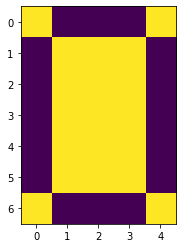

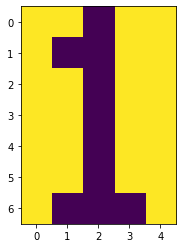

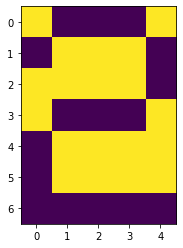

In [23]:
n3_plot=np.array(vector1)
n3_plot=n3_plot.reshape((7,5))
plt.imshow(n3_plot)
plt.show()
n3_plot=np.array(vector2)
n3_plot=n3_plot.reshape((7,5))
plt.imshow(n3_plot)
plt.show()
n3_plot=np.array(vector3)
n3_plot=n3_plot.reshape((7,5))
plt.imshow(n3_plot)

In [24]:
res1=[]
res2=[]
res3=[]
for j in range(35):
    res1.append(np.dot(vector1,W_Hebbian_Rule[:,j]))
    res2.append(np.dot(vector2,W_Hebbian_Rule[:,j]))
    res3.append(np.dot(vector3,W_Hebbian_Rule[:,j]))
    n1=activation_function(res1)
    n2=activation_function(res2)
    n3=activation_function(res3)

print("output1:",n1)
print("real output:",vector1)
print("output2:",n2)
print("real output:",vector2)
print("output3:",n3)
print("real output:",vector3)

output1: [1, -1, -1, -1, 1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, 1]
real output: [ 1 -1 -1 -1  1 -1  1  1  1 -1 -1  1  1  1 -1 -1  1  1  1 -1 -1  1  1  1
 -1 -1  1  1  1 -1  1 -1 -1 -1  1]
output2: [1, 1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, -1, -1, -1, 1]
real output: [ 1  1 -1  1  1  1 -1 -1  1  1  1  1 -1  1  1  1  1 -1  1  1  1  1 -1  1
  1  1  1 -1  1  1  1 -1 -1 -1  1]
output3: [1, -1, -1, -1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, -1, -1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1, -1, -1, -1]
real output: [ 1 -1 -1 -1  1 -1  1  1  1 -1  1  1  1  1 -1  1 -1 -1 -1  1 -1  1  1  1
  1 -1  1  1  1  1 -1 -1 -1 -1 -1]


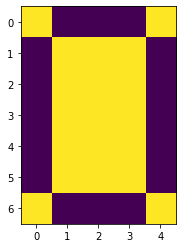

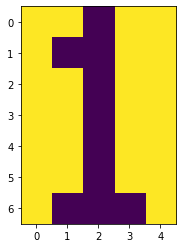

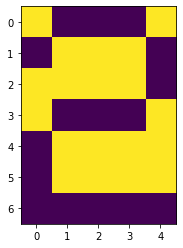

In [25]:
n3_plot=np.array(n1)
n3_plot=n3_plot.reshape((7,5))
plt.imshow(n3_plot)
plt.show()
n3_plot=np.array(n2)
n3_plot=n3_plot.reshape((7,5))
plt.imshow(n3_plot)
plt.show()
n3_plot=np.array(n3)
n3_plot=n3_plot.reshape((7,5))
plt.imshow(n3_plot)

results of adding 20% noise (by order):



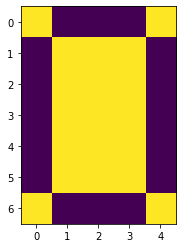

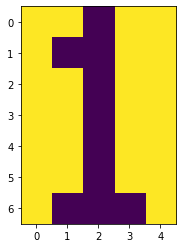

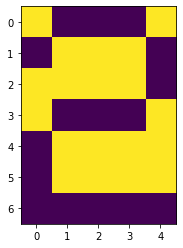

results of adding 80% noise  (by order):



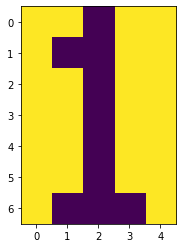

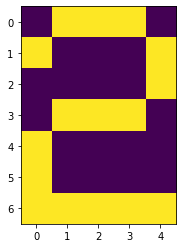

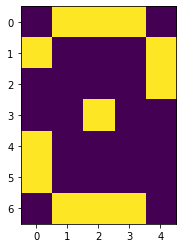

results of adding 20% noise (by order):



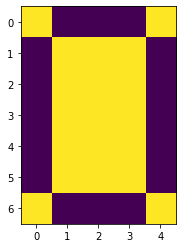

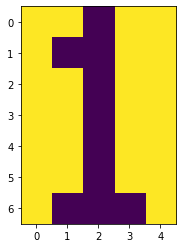

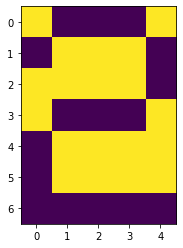

results of adding 80% noise  (by order):



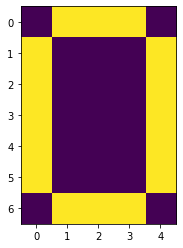

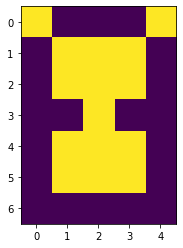

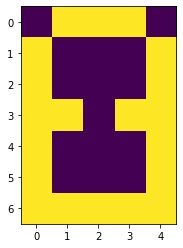

results of adding 20% noise (by order):



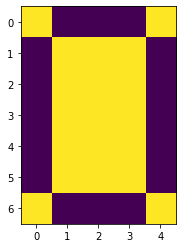

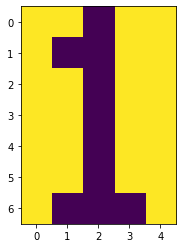

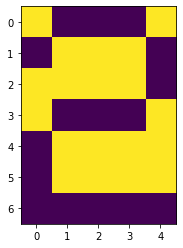

results of adding 80% noise  (by order):



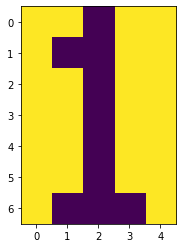

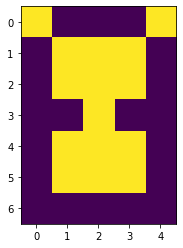

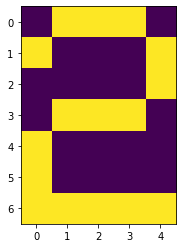

results of adding 20% noise (by order):



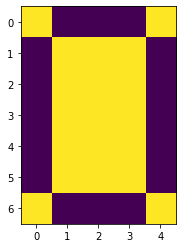

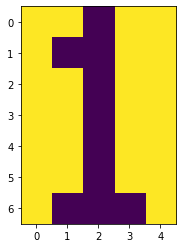

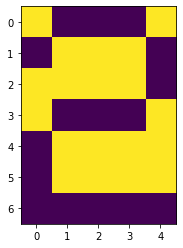

results of adding 80% noise  (by order):



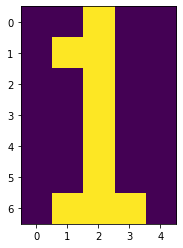

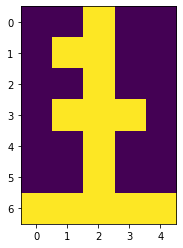

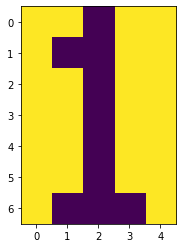

results of adding 20% noise (by order):



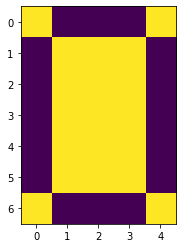

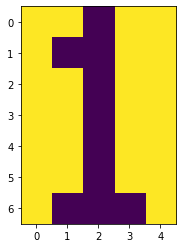

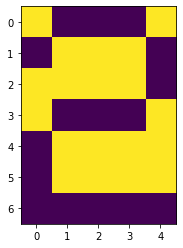

results of adding 80% noise  (by order):



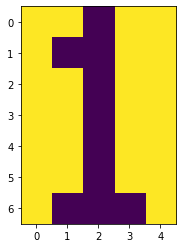

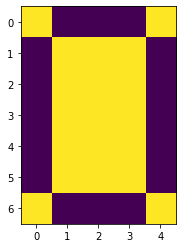

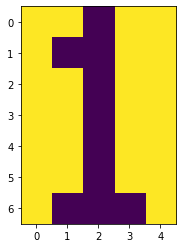

results of adding 20% noise (by order):



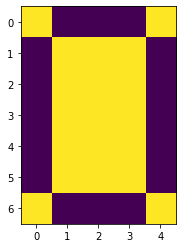

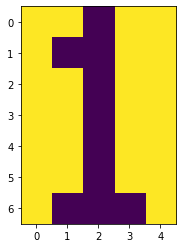

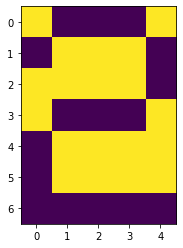

results of adding 80% noise  (by order):



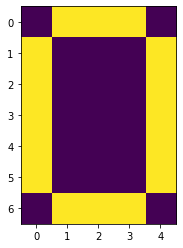

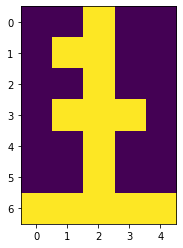

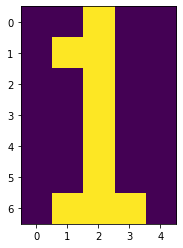

results of adding 20% noise (by order):



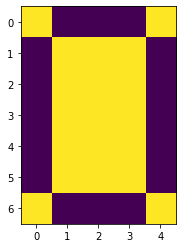

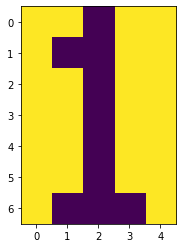

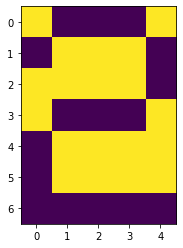

results of adding 80% noise  (by order):



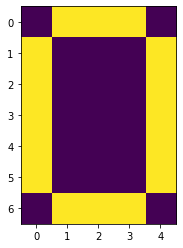

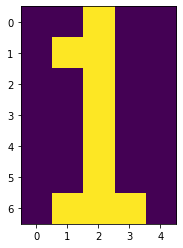

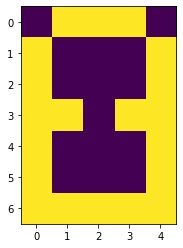

results of adding 20% noise (by order):



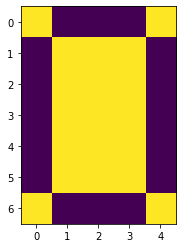

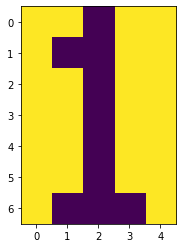

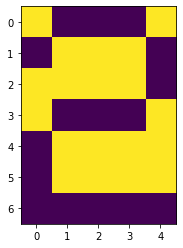

results of adding 80% noise  (by order):



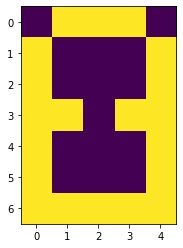

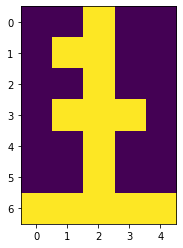

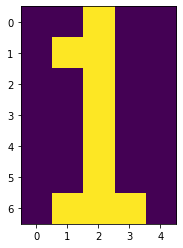

results of adding 20% noise (by order):



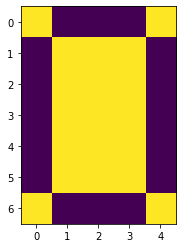

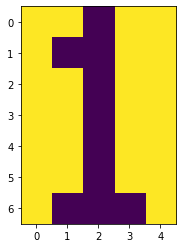

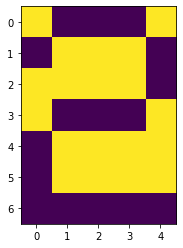

results of adding 80% noise  (by order):



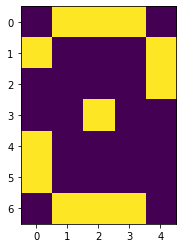

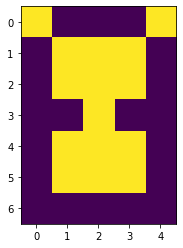

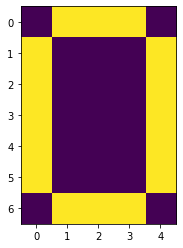

results of adding 20% noise (by order):



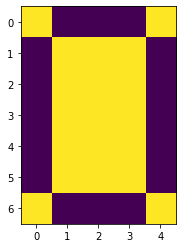

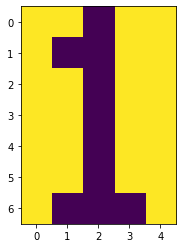

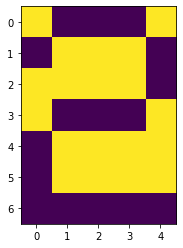

results of adding 80% noise  (by order):



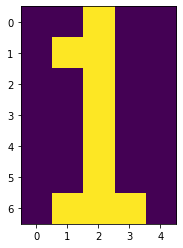

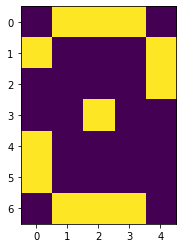

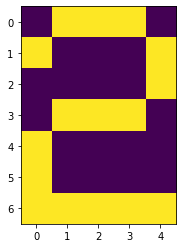

results of adding 20% noise (by order):



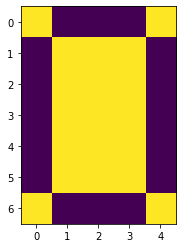

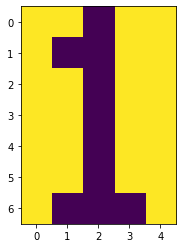

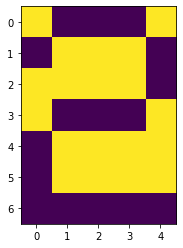

results of adding 80% noise  (by order):



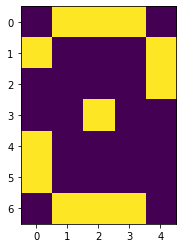

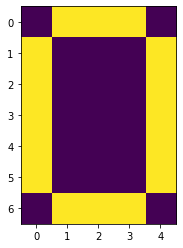

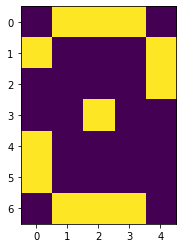

results of adding 20% noise (by order):



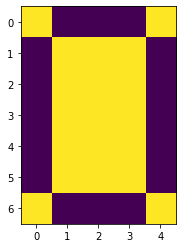

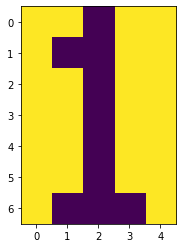

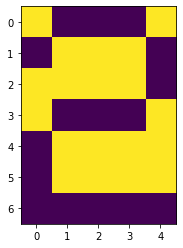

results of adding 80% noise  (by order):



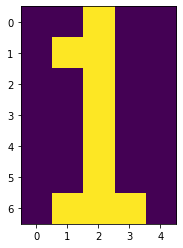

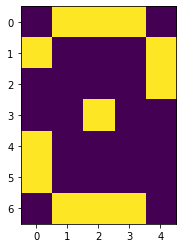

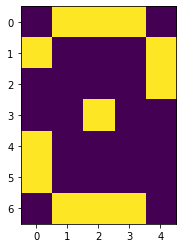

results of adding 20% noise (by order):



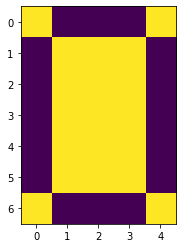

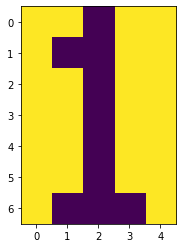

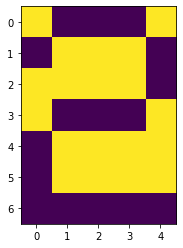

results of adding 80% noise  (by order):



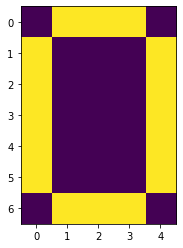

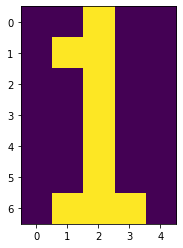

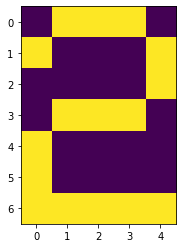

results of adding 20% noise (by order):



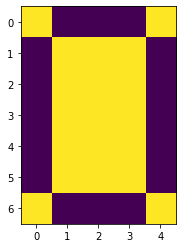

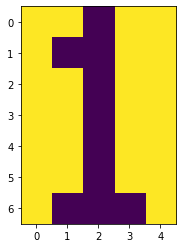

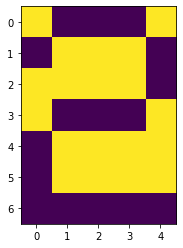

results of adding 80% noise  (by order):



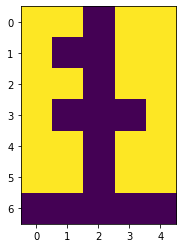

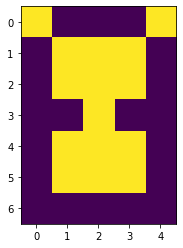

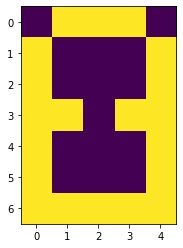

results of adding 20% noise (by order):



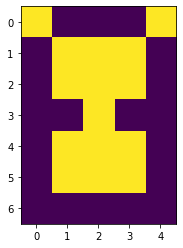

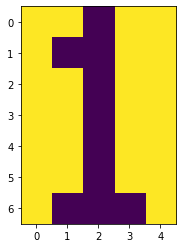

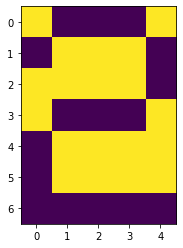

results of adding 80% noise  (by order):



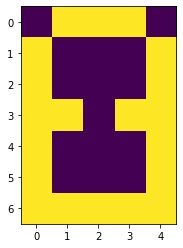

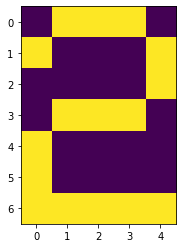

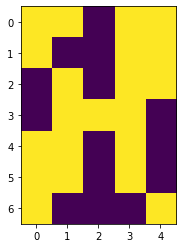

results of adding 20% noise (by order):



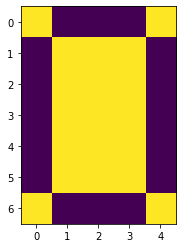

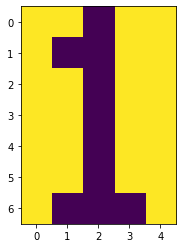

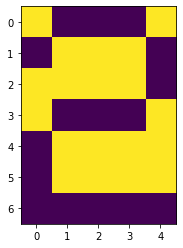

results of adding 80% noise  (by order):



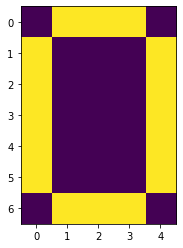

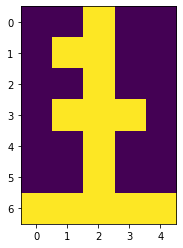

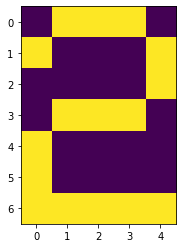

results of adding 20% noise (by order):



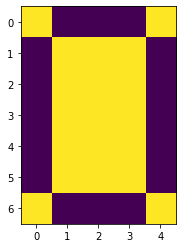

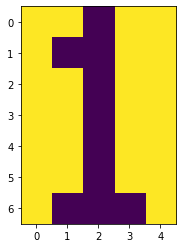

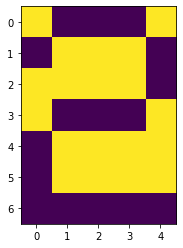

results of adding 80% noise  (by order):



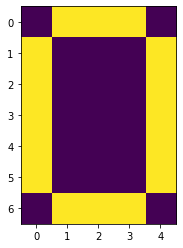

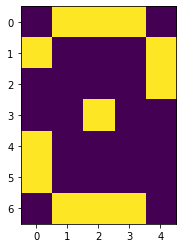

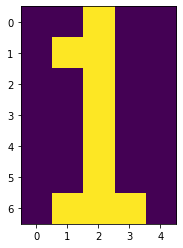

results of adding 20% noise (by order):



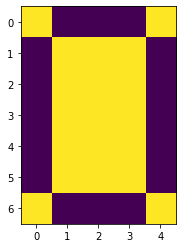

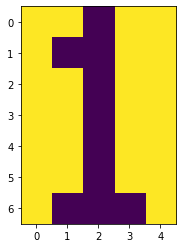

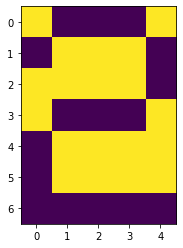

results of adding 80% noise  (by order):



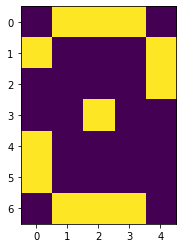

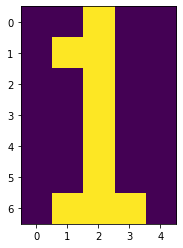

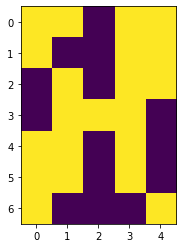

results of adding 20% noise (by order):



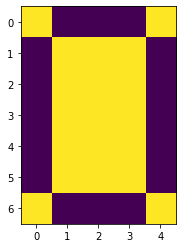

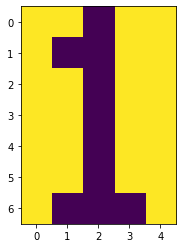

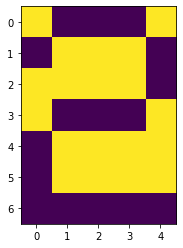

results of adding 80% noise  (by order):



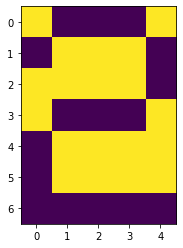

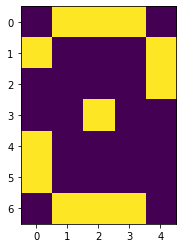

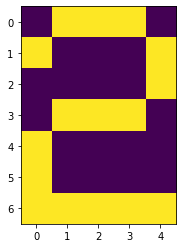

results of adding 20% noise (by order):



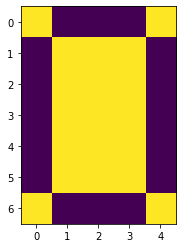

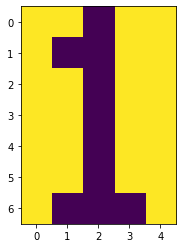

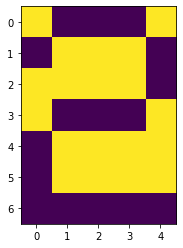

results of adding 80% noise  (by order):



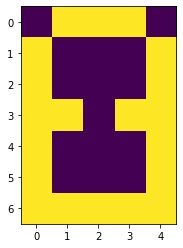

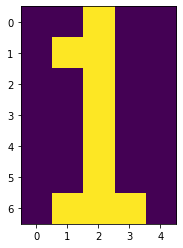

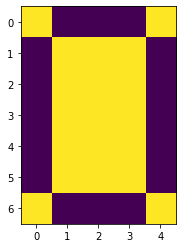

results of adding 20% noise (by order):



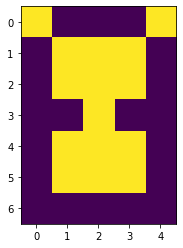

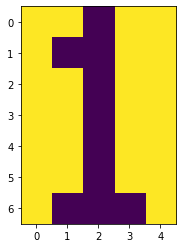

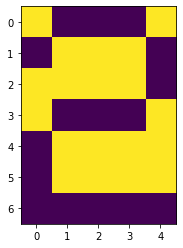

results of adding 80% noise  (by order):



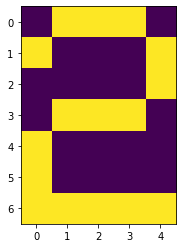

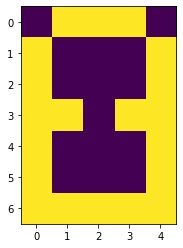

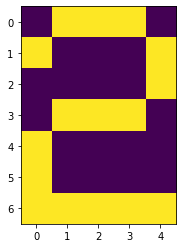

results of adding 20% noise (by order):



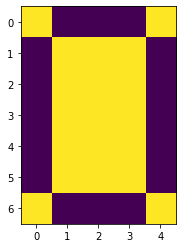

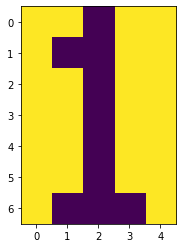

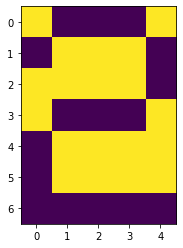

results of adding 80% noise  (by order):



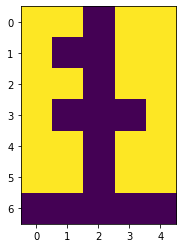

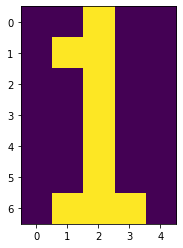

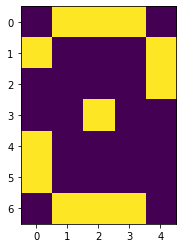

results of adding 20% noise (by order):



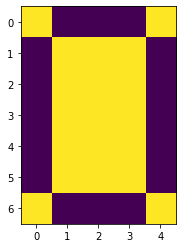

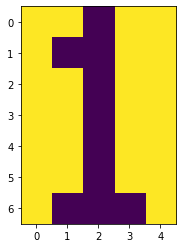

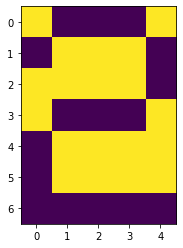

results of adding 80% noise  (by order):



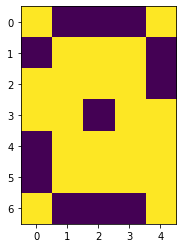

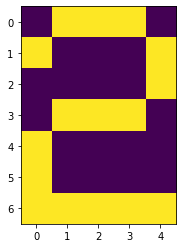

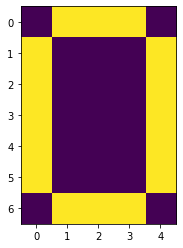

results of adding 20% noise (by order):



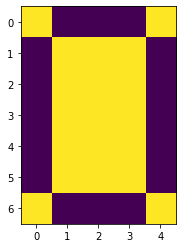

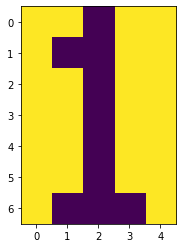

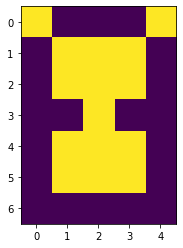

results of adding 80% noise  (by order):



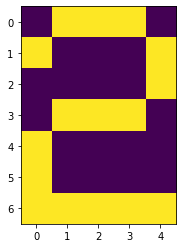

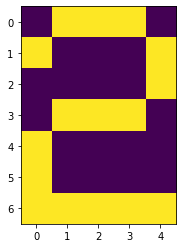

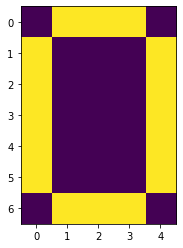

results of adding 20% noise (by order):



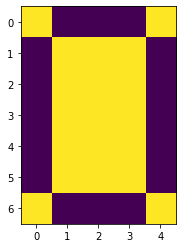

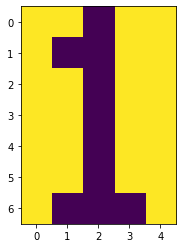

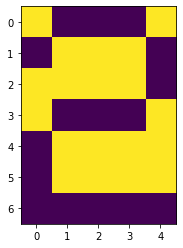

results of adding 80% noise  (by order):



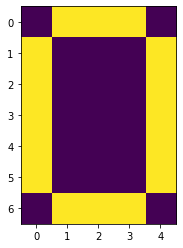

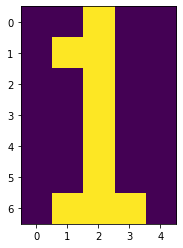

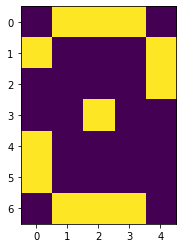

results of adding 20% noise (by order):



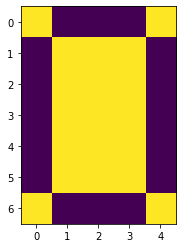

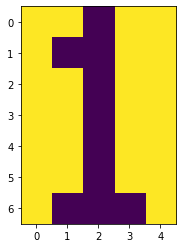

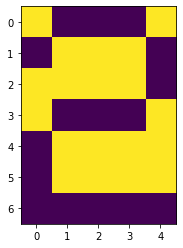

results of adding 80% noise  (by order):



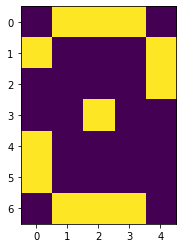

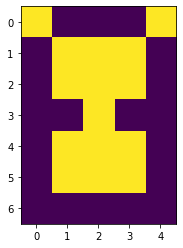

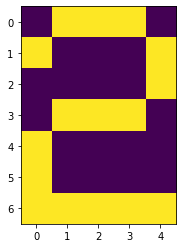

results of adding 20% noise (by order):



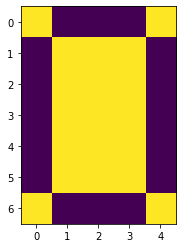

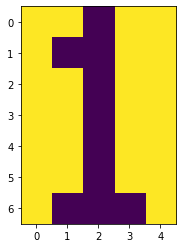

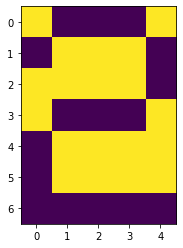

results of adding 80% noise  (by order):



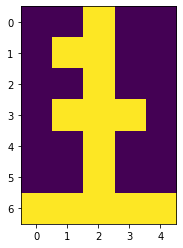

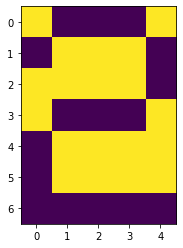

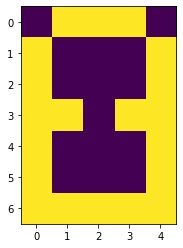

results of adding 20% noise (by order):



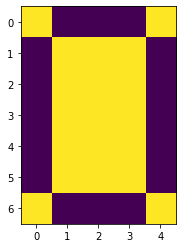

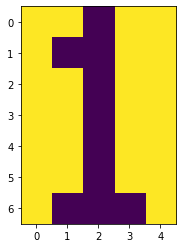

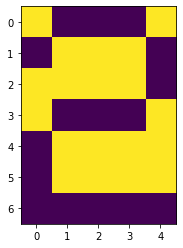

results of adding 80% noise  (by order):



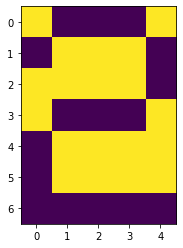

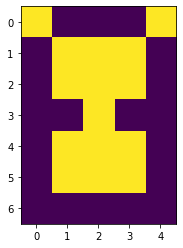

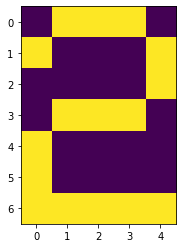

results of adding 20% noise (by order):



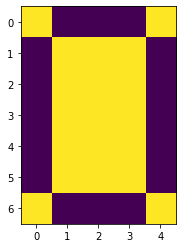

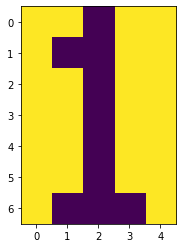

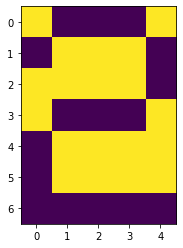

results of adding 80% noise  (by order):



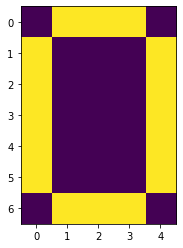

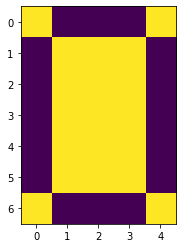

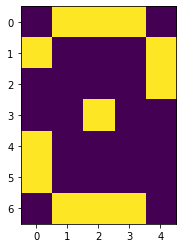

results of adding 20% noise (by order):



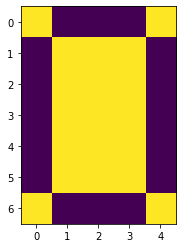

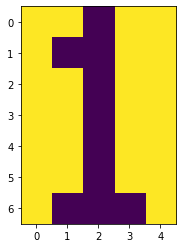

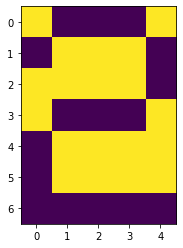

results of adding 80% noise  (by order):



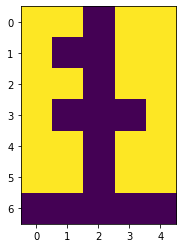

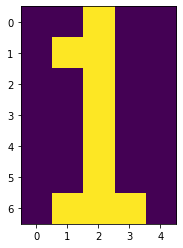

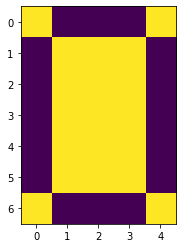

results of adding 20% noise (by order):



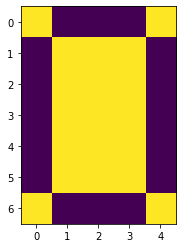

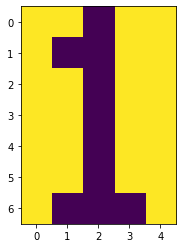

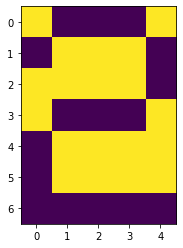

results of adding 80% noise  (by order):



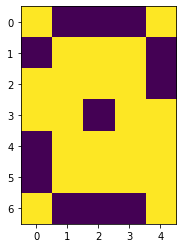

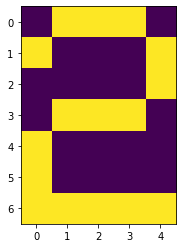

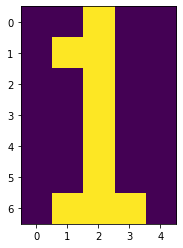

results of adding 20% noise (by order):



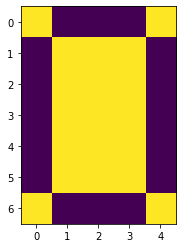

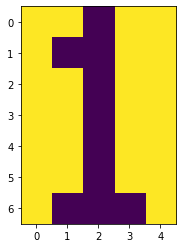

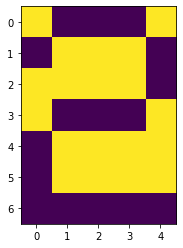

results of adding 80% noise  (by order):



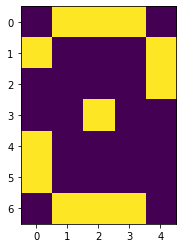

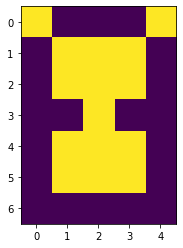

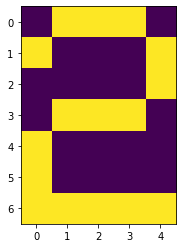

results of adding 20% noise (by order):



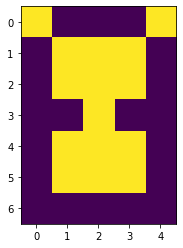

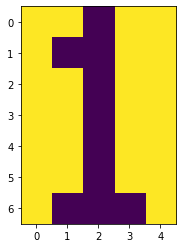

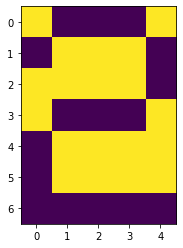

results of adding 80% noise  (by order):



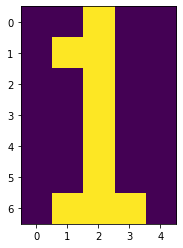

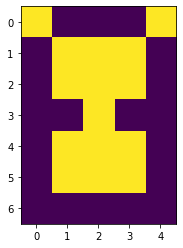

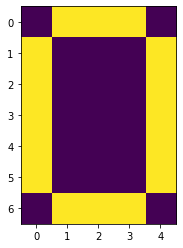

results of adding 20% noise (by order):



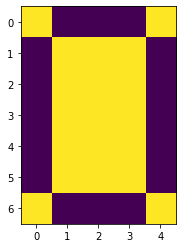

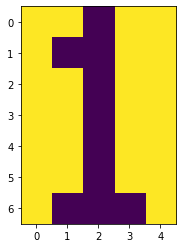

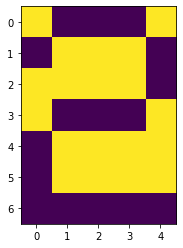

results of adding 80% noise  (by order):



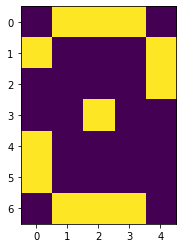

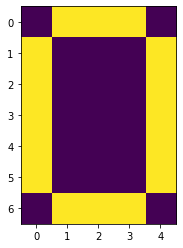

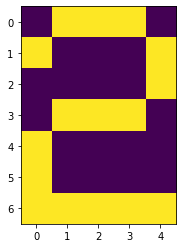

results of adding 20% noise (by order):



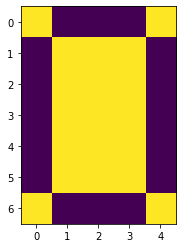

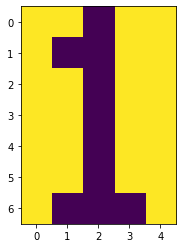

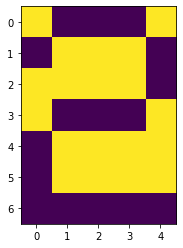

results of adding 80% noise  (by order):



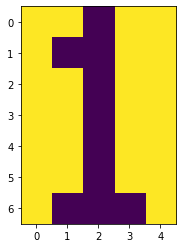

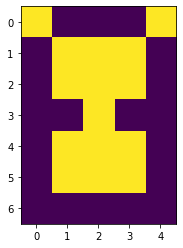

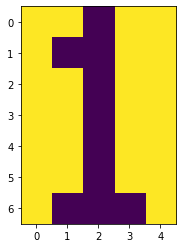

results of adding 20% noise (by order):



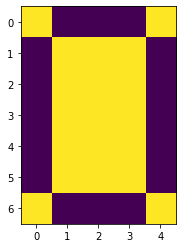

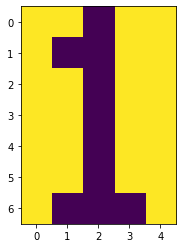

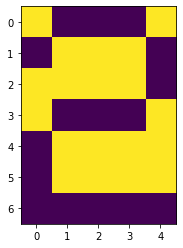

results of adding 80% noise  (by order):



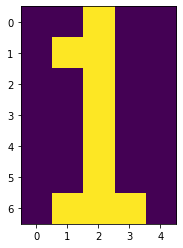

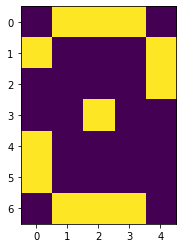

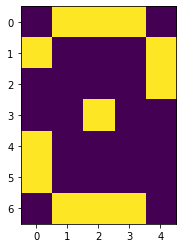

results of adding 20% noise (by order):



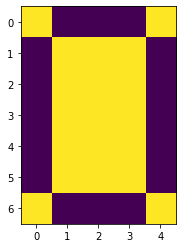

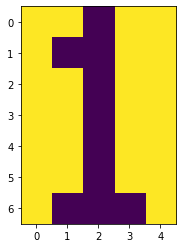

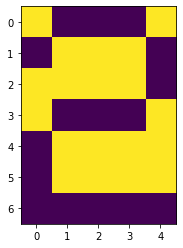

results of adding 80% noise  (by order):



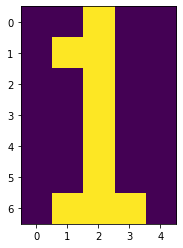

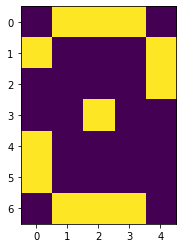

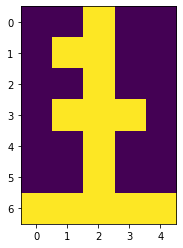

results of adding 20% noise (by order):



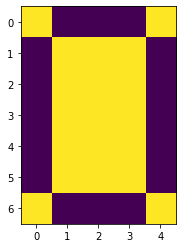

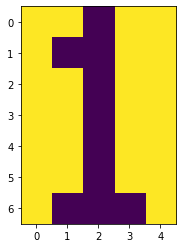

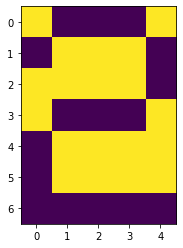

results of adding 80% noise  (by order):



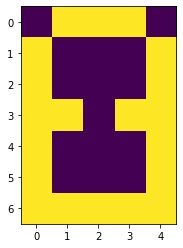

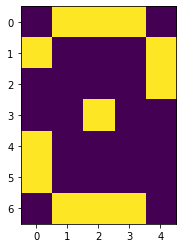

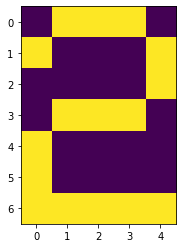

results of adding 20% noise (by order):



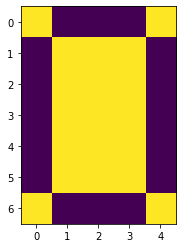

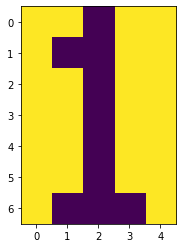

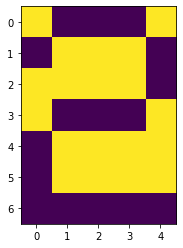

results of adding 80% noise  (by order):



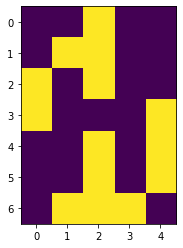

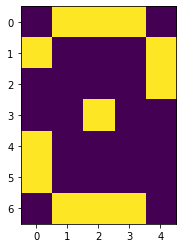

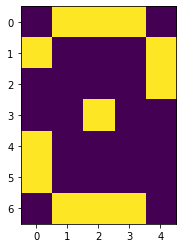

results of adding 20% noise (by order):



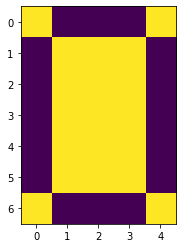

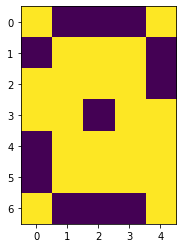

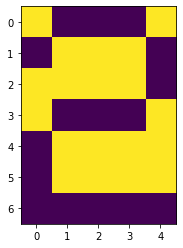

results of adding 80% noise  (by order):



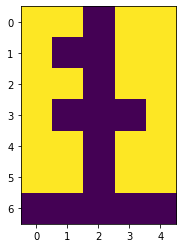

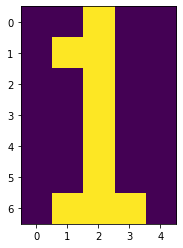

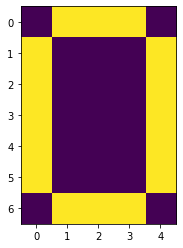

results of adding 20% noise (by order):



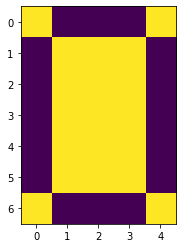

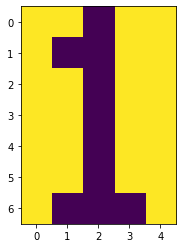

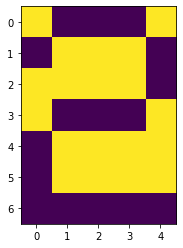

results of adding 80% noise  (by order):



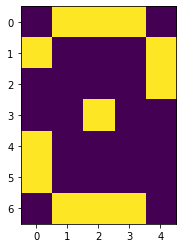

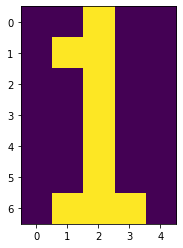

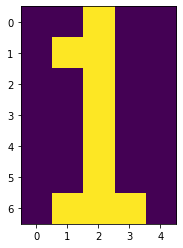

results of adding 20% noise (by order):



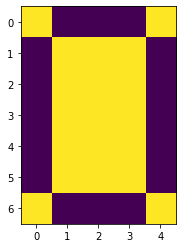

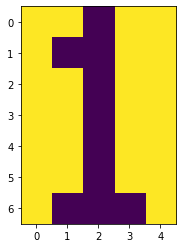

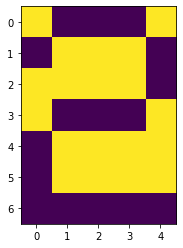

results of adding 80% noise  (by order):



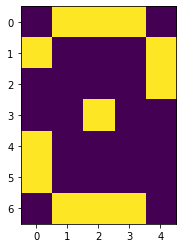

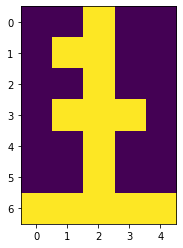

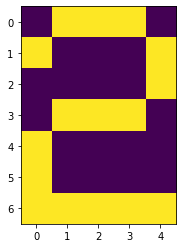

results of adding 20% noise (by order):



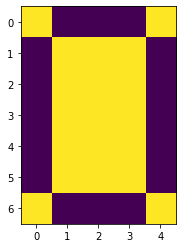

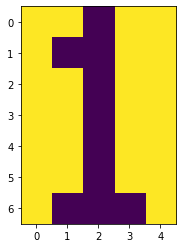

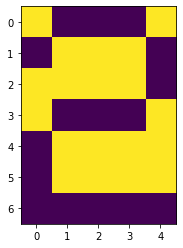

results of adding 80% noise  (by order):



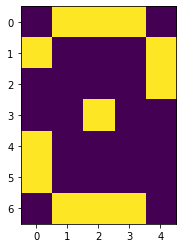

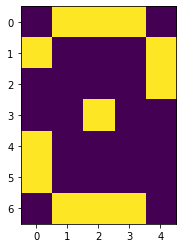

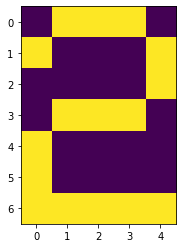

results of adding 20% noise (by order):



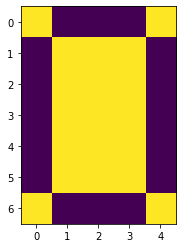

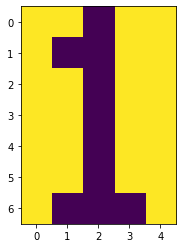

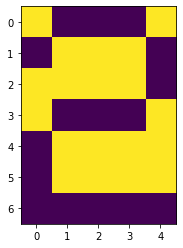

results of adding 80% noise  (by order):



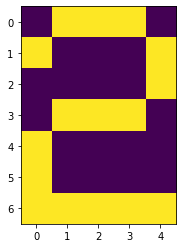

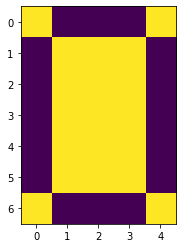

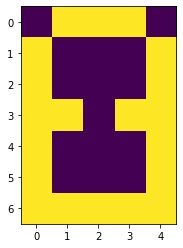

results of adding 20% noise (by order):



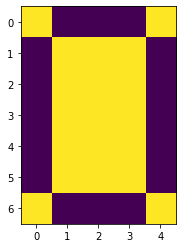

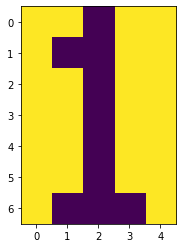

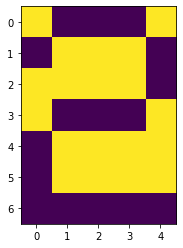

results of adding 80% noise  (by order):



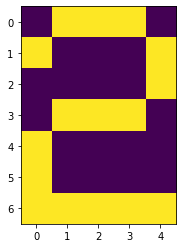

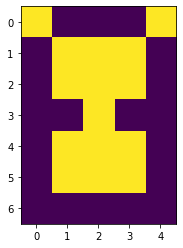

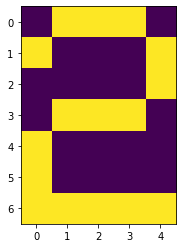

results of adding 20% noise (by order):



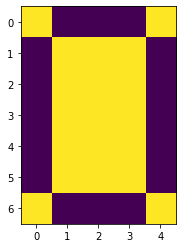

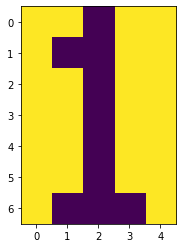

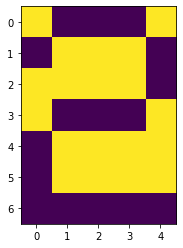

results of adding 80% noise  (by order):



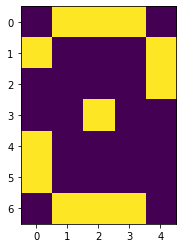

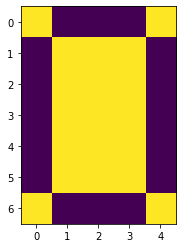

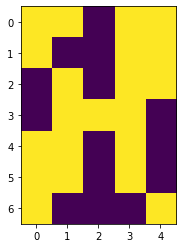

results of adding 20% noise (by order):



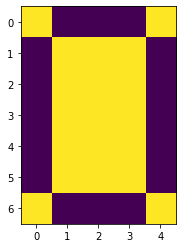

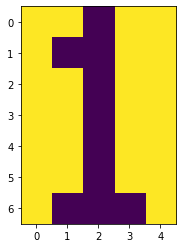

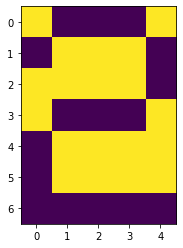

results of adding 80% noise  (by order):



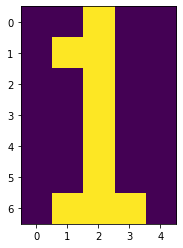

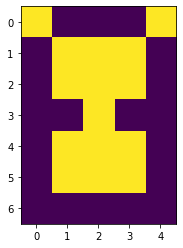

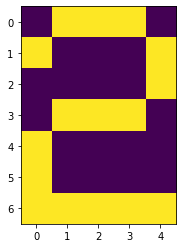

results of adding 20% noise (by order):



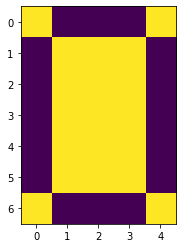

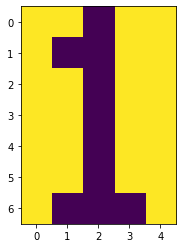

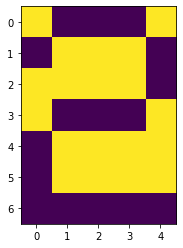

results of adding 80% noise  (by order):



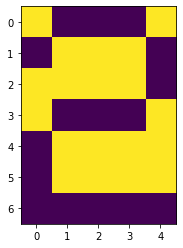

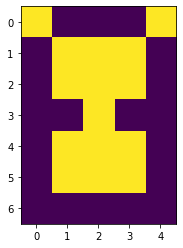

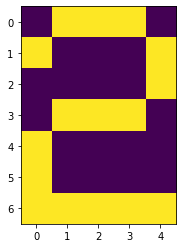

results of adding 20% noise (by order):



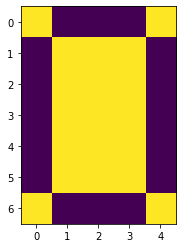

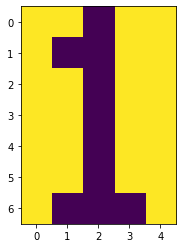

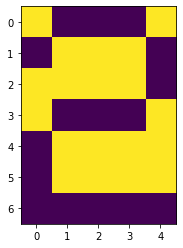

results of adding 80% noise  (by order):



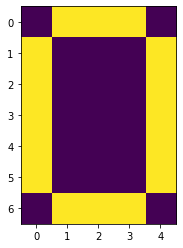

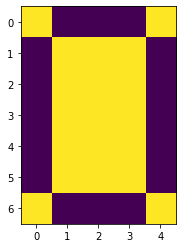

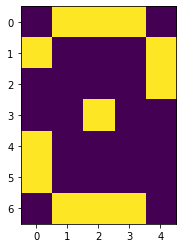

results of adding 20% noise (by order):



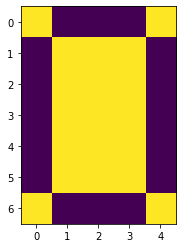

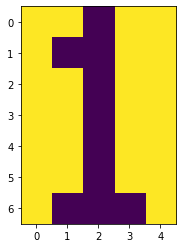

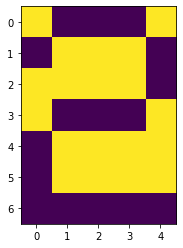

results of adding 80% noise  (by order):



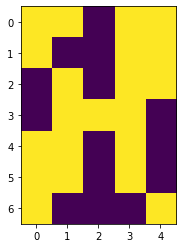

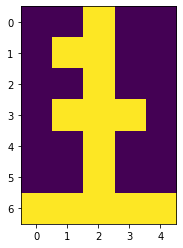

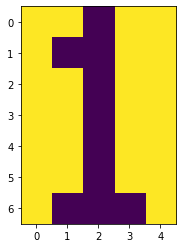

results of adding 20% noise (by order):



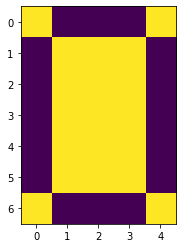

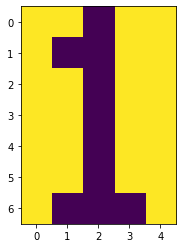

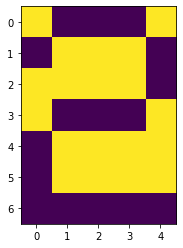

results of adding 80% noise  (by order):



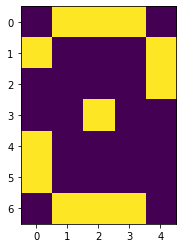

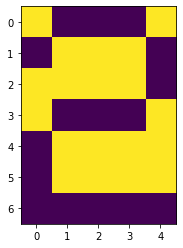

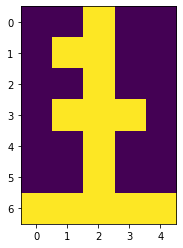

results of adding 20% noise (by order):



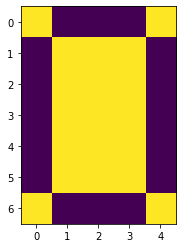

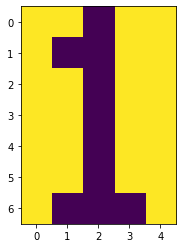

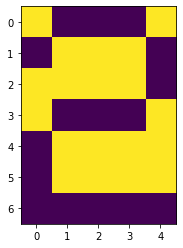

results of adding 80% noise  (by order):



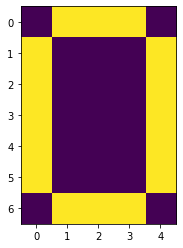

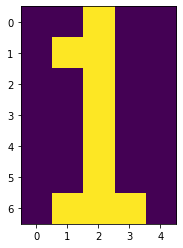

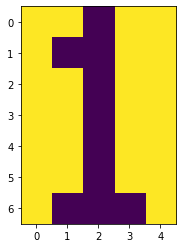

results of adding 20% noise (by order):



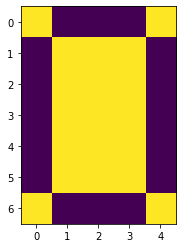

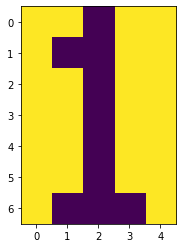

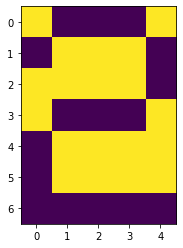

results of adding 80% noise  (by order):



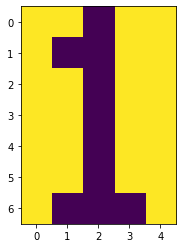

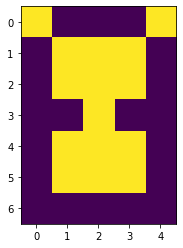

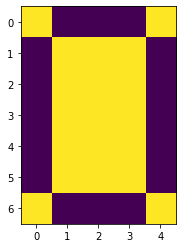

results of adding 20% noise (by order):



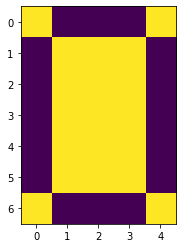

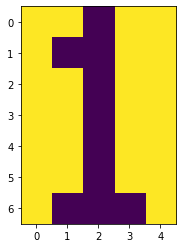

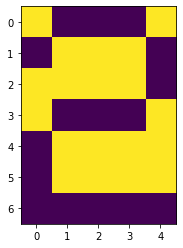

results of adding 80% noise  (by order):



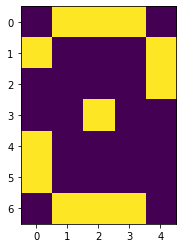

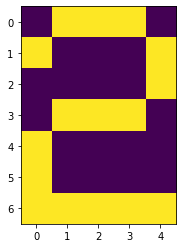

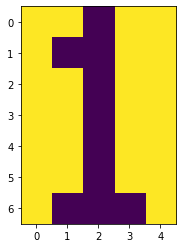

results of adding 20% noise (by order):



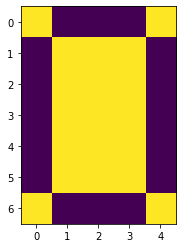

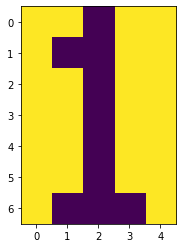

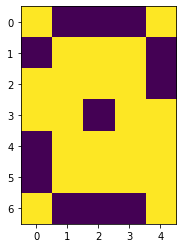

results of adding 80% noise  (by order):



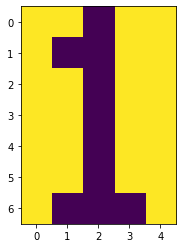

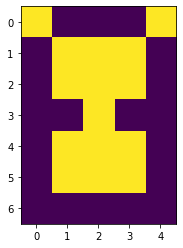

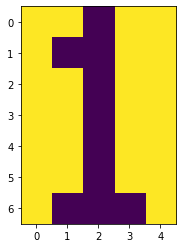

results of adding 20% noise (by order):



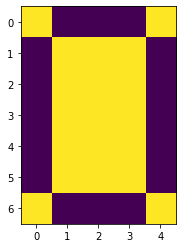

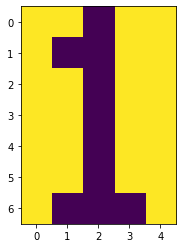

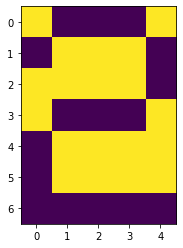

results of adding 80% noise  (by order):



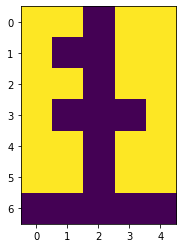

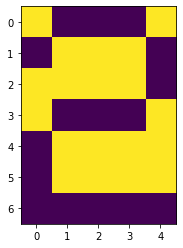

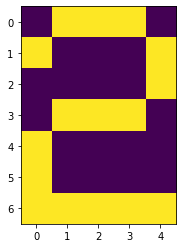

results of adding 20% noise (by order):



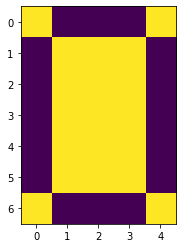

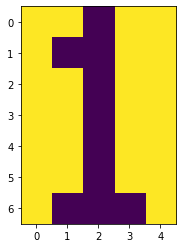

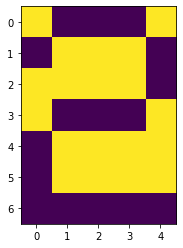

results of adding 80% noise  (by order):



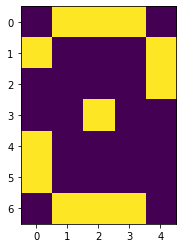

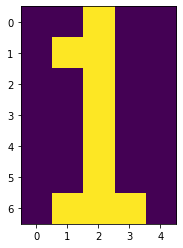

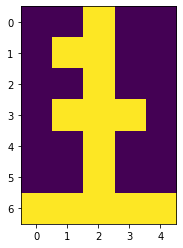

results of adding 20% noise (by order):



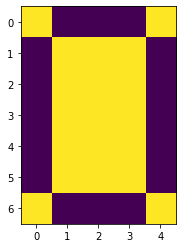

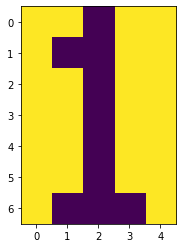

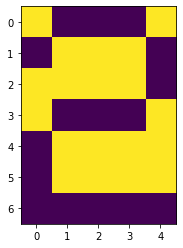

results of adding 80% noise  (by order):



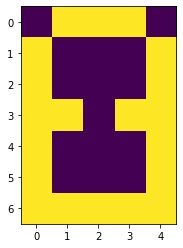

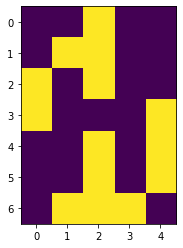

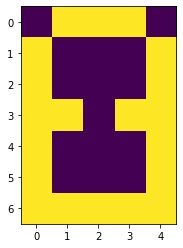

results of adding 20% noise (by order):



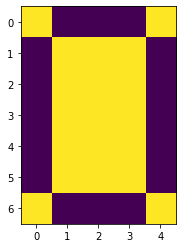

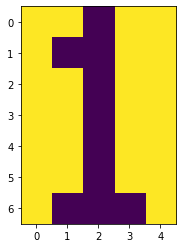

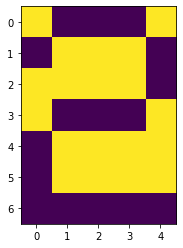

results of adding 80% noise  (by order):



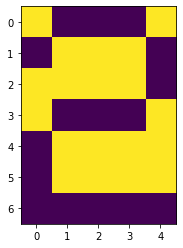

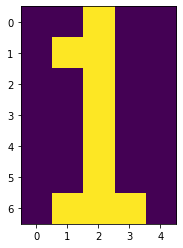

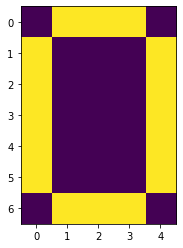

results of adding 20% noise (by order):



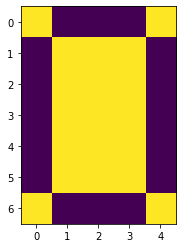

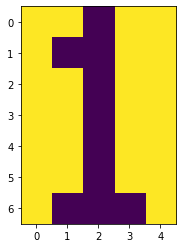

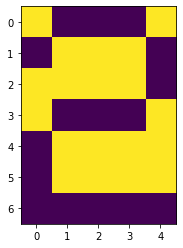

results of adding 80% noise  (by order):



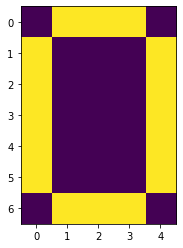

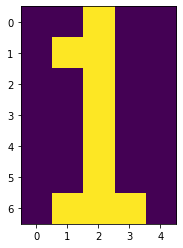

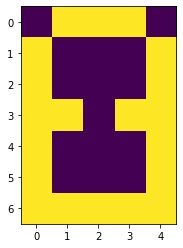

results of adding 20% noise (by order):



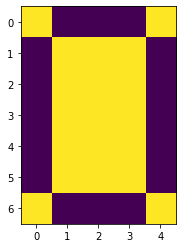

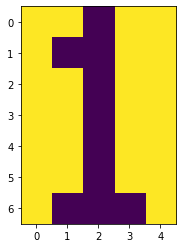

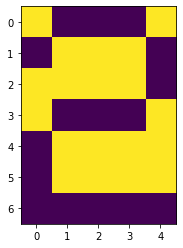

results of adding 80% noise  (by order):



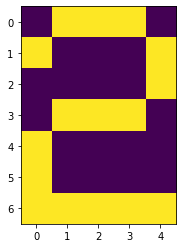

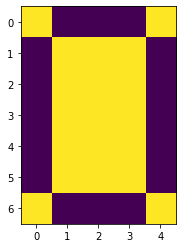

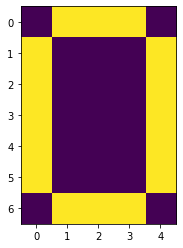

results of adding 20% noise (by order):



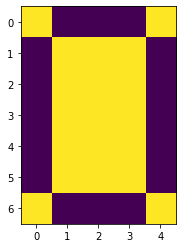

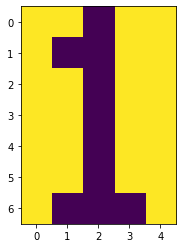

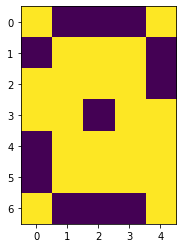

results of adding 80% noise  (by order):



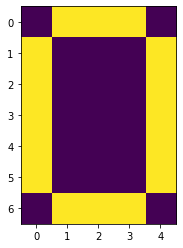

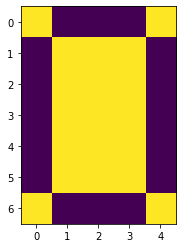

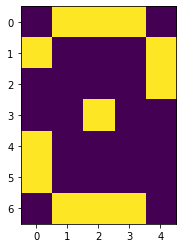

results of adding 20% noise (by order):



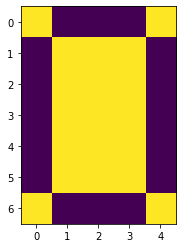

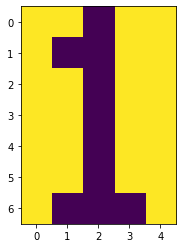

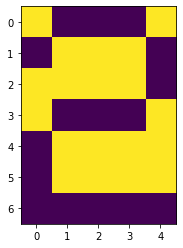

results of adding 80% noise  (by order):



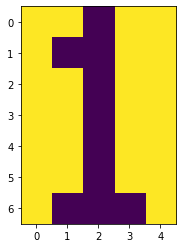

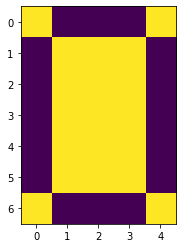

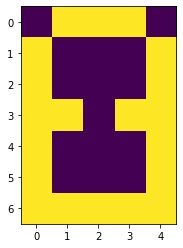

results of adding 20% noise (by order):



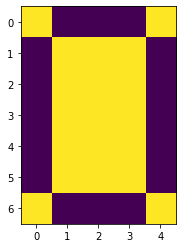

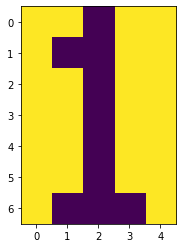

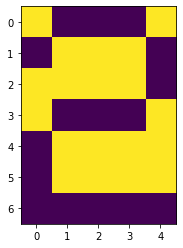

results of adding 80% noise  (by order):



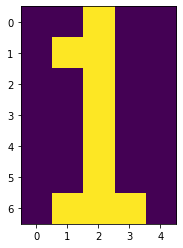

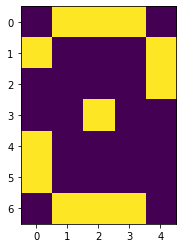

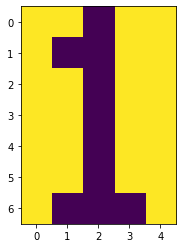

results of adding 20% noise (by order):



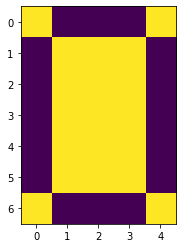

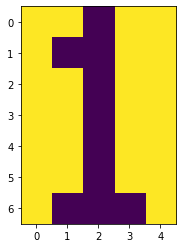

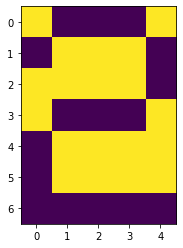

results of adding 80% noise  (by order):



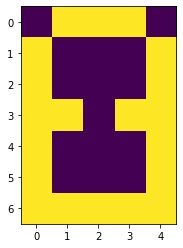

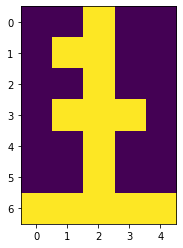

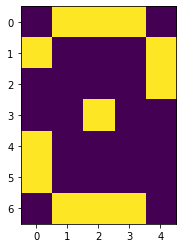

results of adding 20% noise (by order):



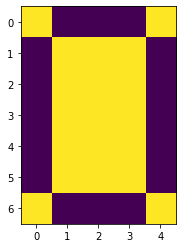

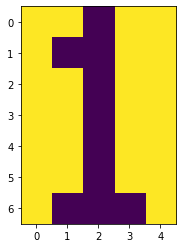

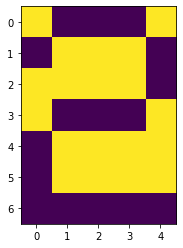

results of adding 80% noise  (by order):



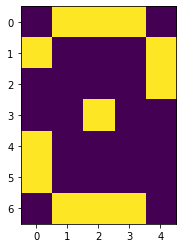

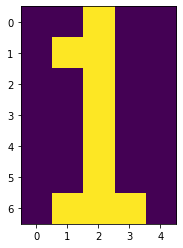

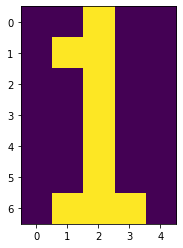

results of adding 20% noise (by order):



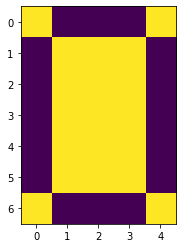

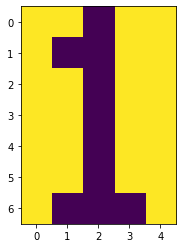

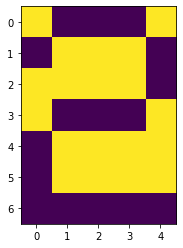

results of adding 80% noise  (by order):



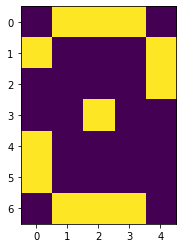

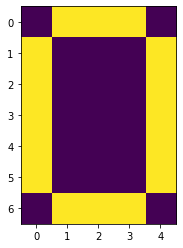

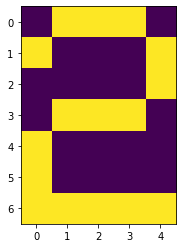

results of adding 20% noise (by order):



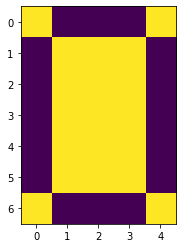

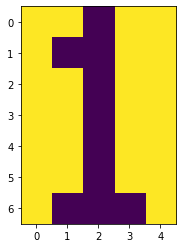

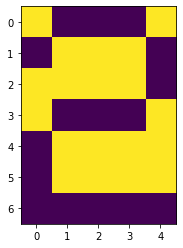

results of adding 80% noise  (by order):



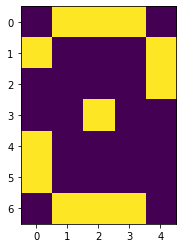

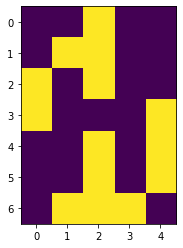

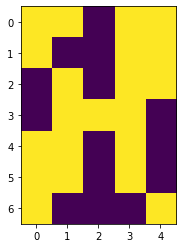

results of adding 20% noise (by order):



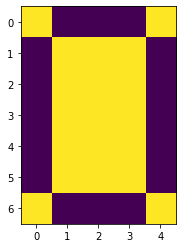

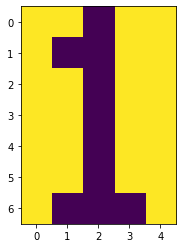

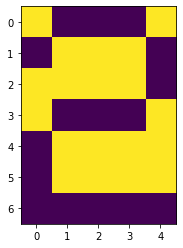

results of adding 80% noise  (by order):



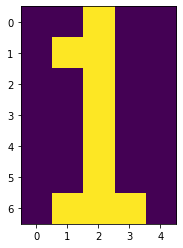

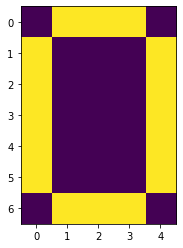

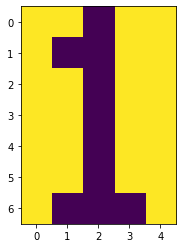

results of adding 20% noise (by order):



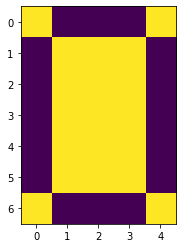

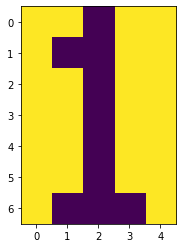

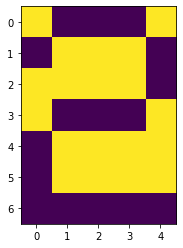

results of adding 80% noise  (by order):



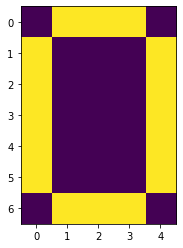

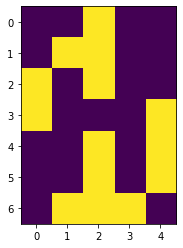

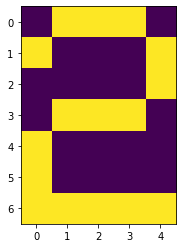

results of adding 20% noise (by order):



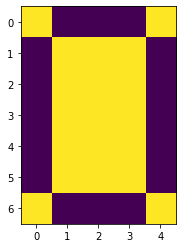

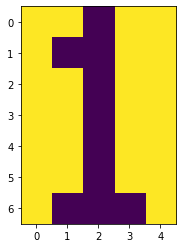

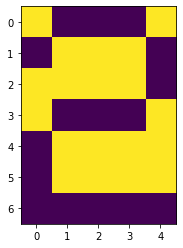

results of adding 80% noise  (by order):



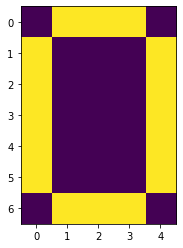

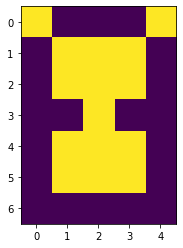

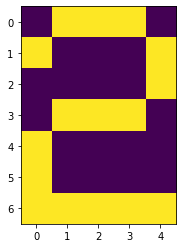

results of adding 20% noise (by order):



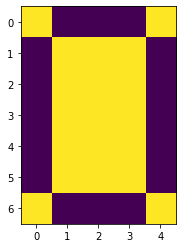

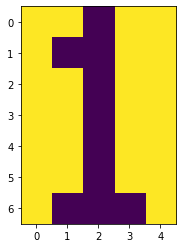

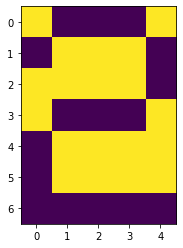

results of adding 80% noise  (by order):



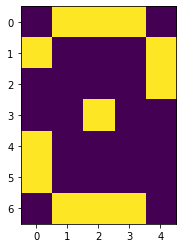

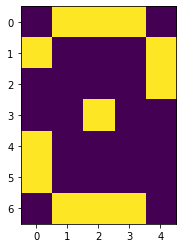

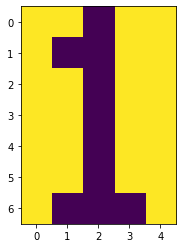

results of adding 20% noise (by order):



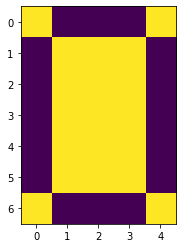

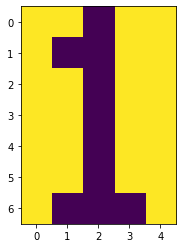

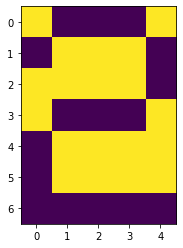

results of adding 80% noise  (by order):



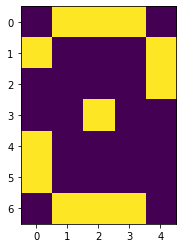

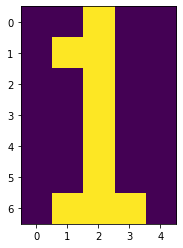

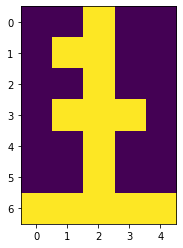

results of adding 20% noise (by order):



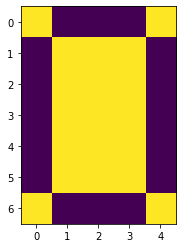

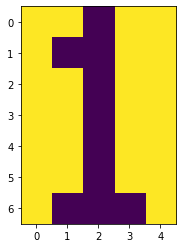

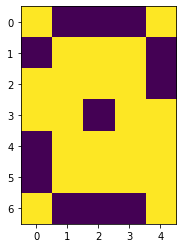

results of adding 80% noise  (by order):



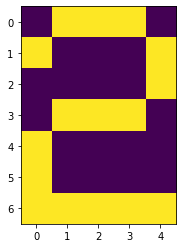

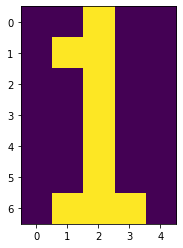

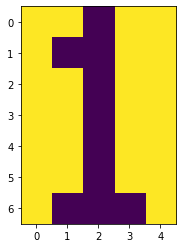

results of adding 20% noise (by order):



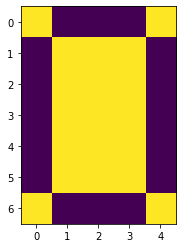

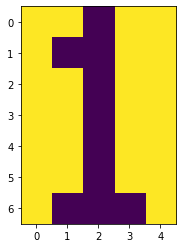

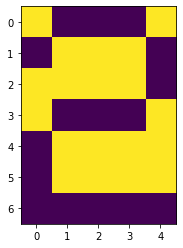

results of adding 80% noise  (by order):



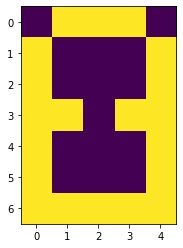

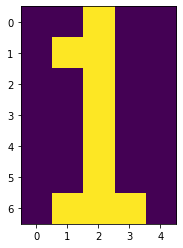

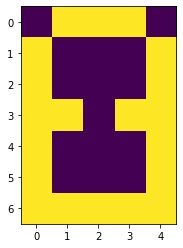

results of adding 20% noise (by order):



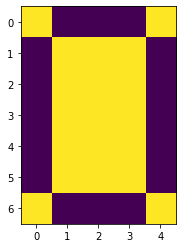

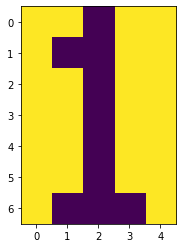

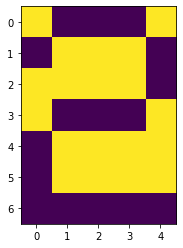

results of adding 80% noise  (by order):



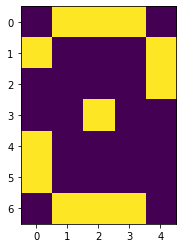

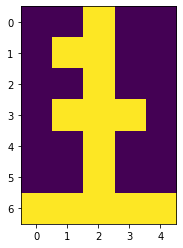

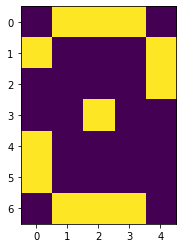

results of adding 20% noise (by order):



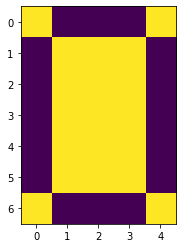

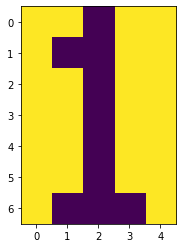

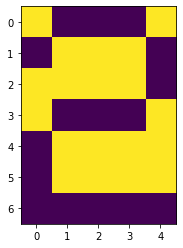

results of adding 80% noise  (by order):



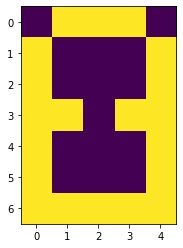

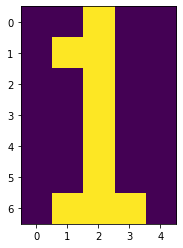

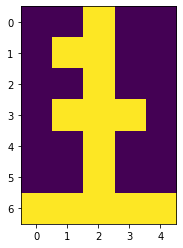

results of adding 20% noise (by order):



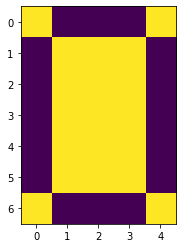

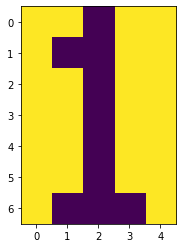

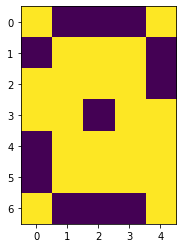

results of adding 80% noise  (by order):



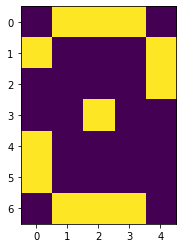

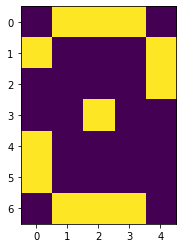

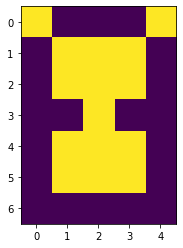

results of adding 20% noise (by order):



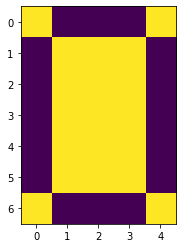

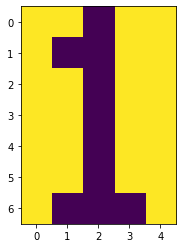

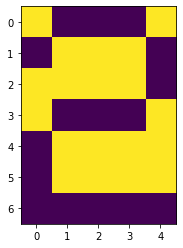

results of adding 80% noise  (by order):



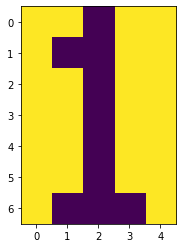

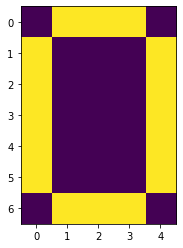

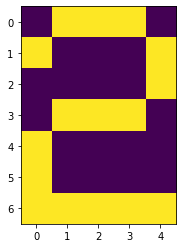

results of adding 20% noise (by order):



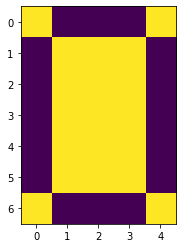

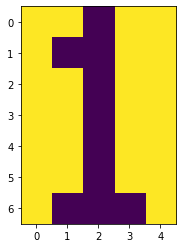

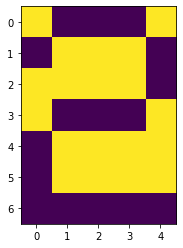

results of adding 80% noise  (by order):



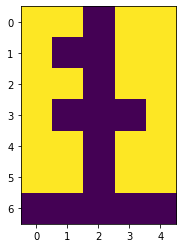

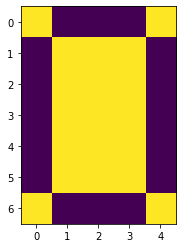

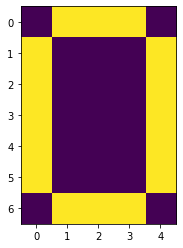

results of adding 20% noise (by order):



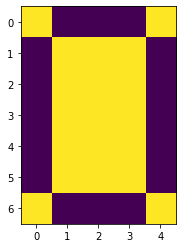

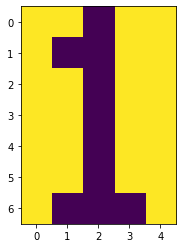

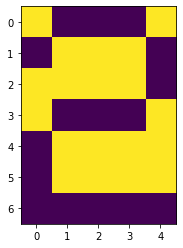

results of adding 80% noise  (by order):



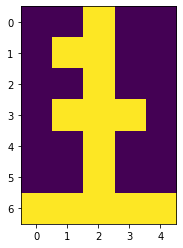

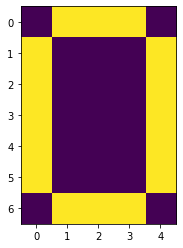

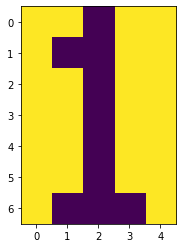

results of adding 20% noise (by order):



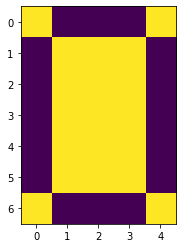

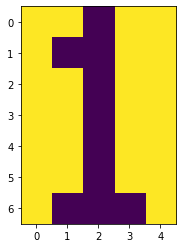

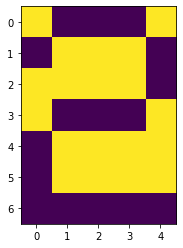

results of adding 80% noise  (by order):



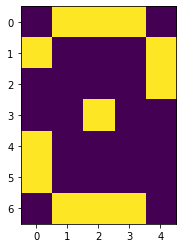

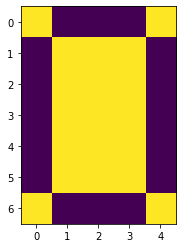

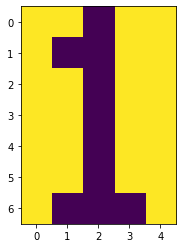

results of adding 20% noise (by order):



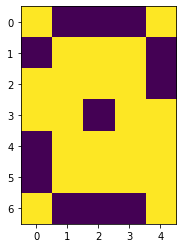

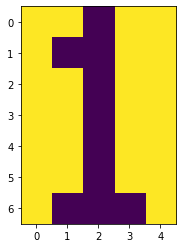

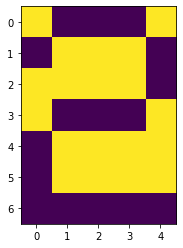

results of adding 80% noise  (by order):



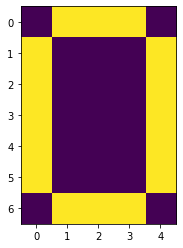

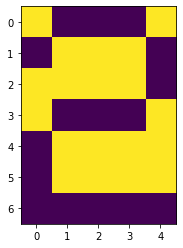

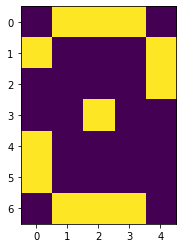

results of adding 20% noise (by order):



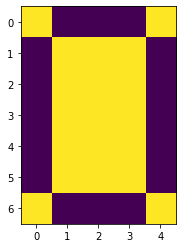

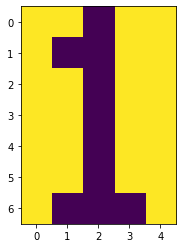

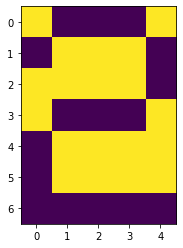

results of adding 80% noise  (by order):



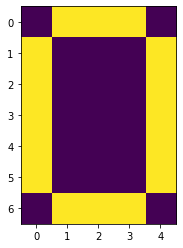

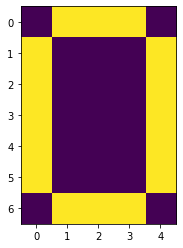

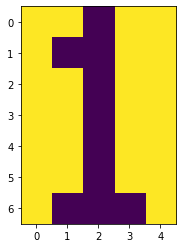

results of adding 20% noise (by order):



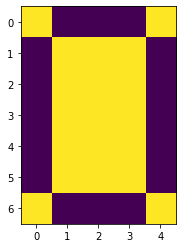

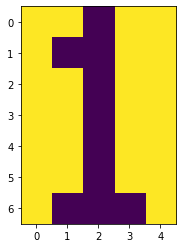

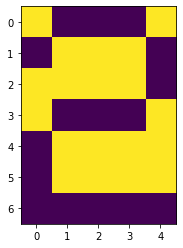

results of adding 80% noise  (by order):



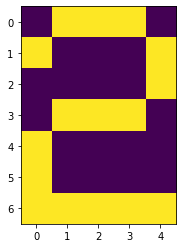

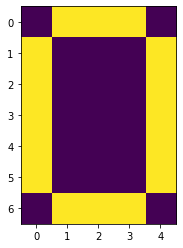

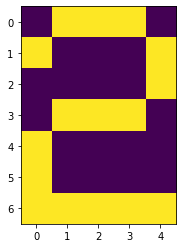

results of adding 20% noise (by order):



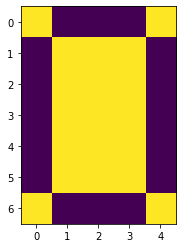

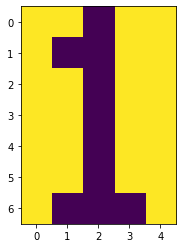

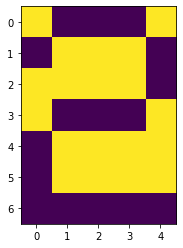

results of adding 80% noise  (by order):



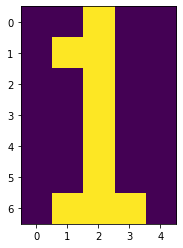

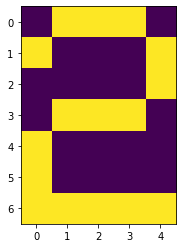

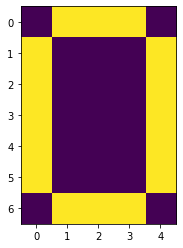

results of adding 20% noise (by order):



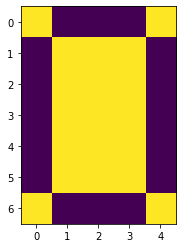

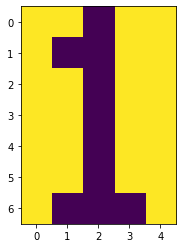

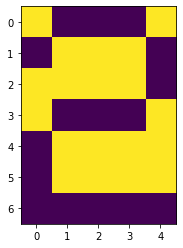

results of adding 80% noise  (by order):



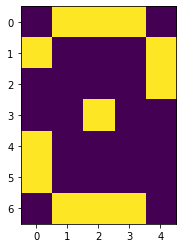

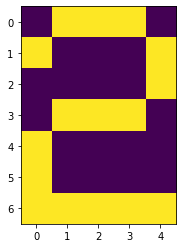

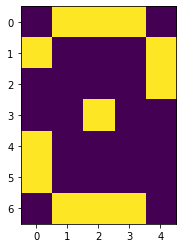

results of adding 20% noise (by order):



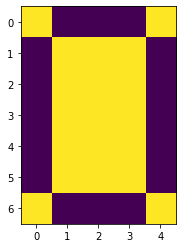

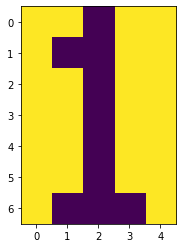

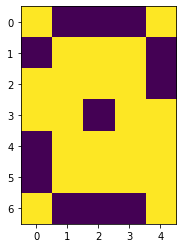

results of adding 80% noise  (by order):



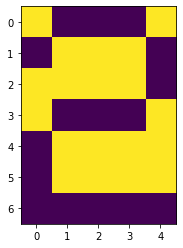

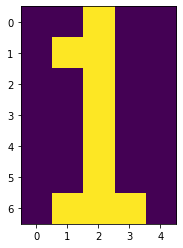

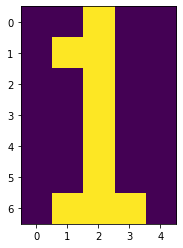

results of adding 20% noise (by order):



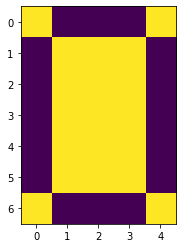

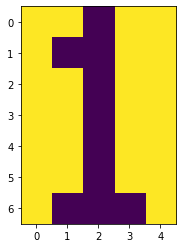

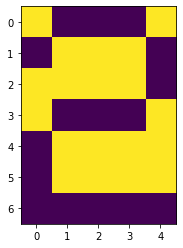

results of adding 80% noise  (by order):



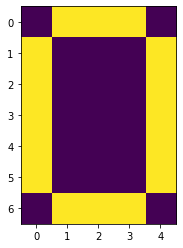

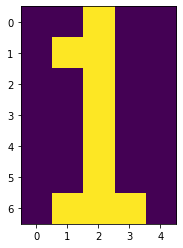

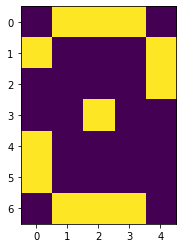

results of adding 20% noise (by order):



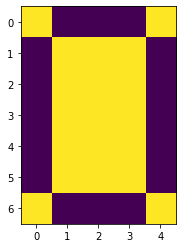

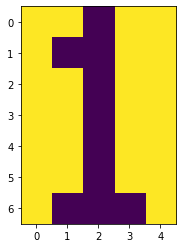

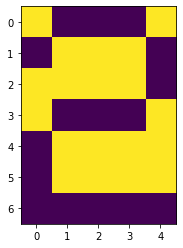

results of adding 80% noise  (by order):



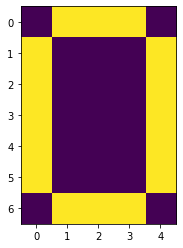

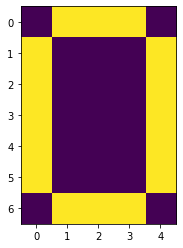

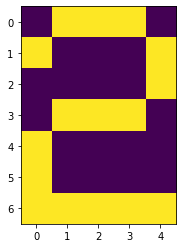

results of adding 20% noise (by order):



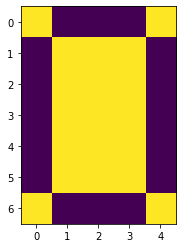

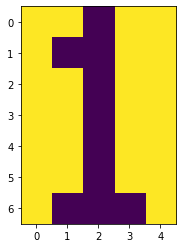

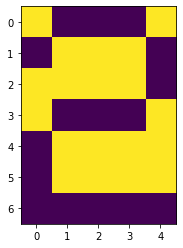

results of adding 80% noise  (by order):



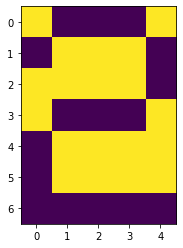

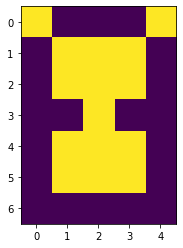

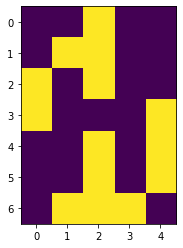

results of adding 20% noise (by order):



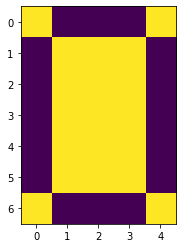

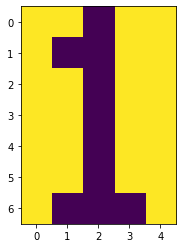

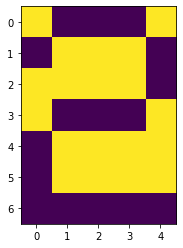

results of adding 80% noise  (by order):



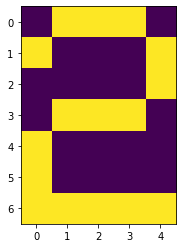

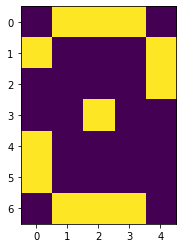

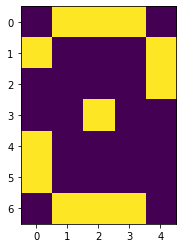

results of adding 20% noise (by order):



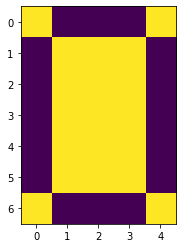

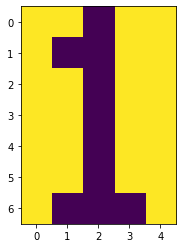

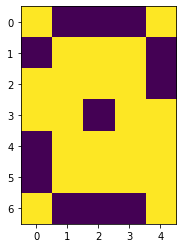

results of adding 80% noise  (by order):



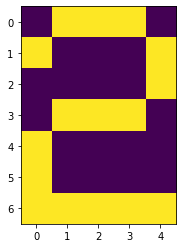

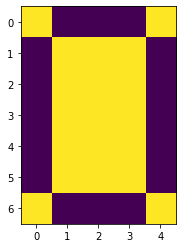

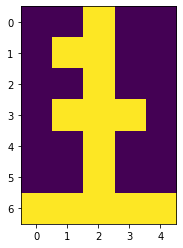

results of adding 20% noise (by order):



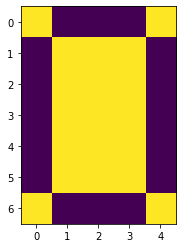

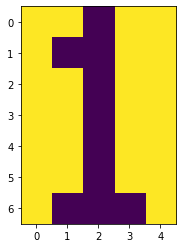

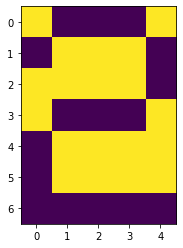

results of adding 80% noise  (by order):



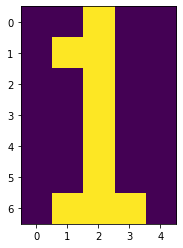

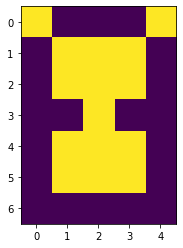

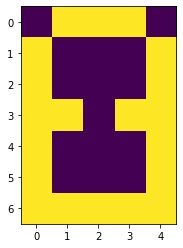

results of adding 20% noise (by order):



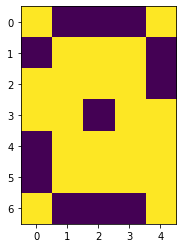

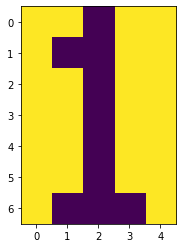

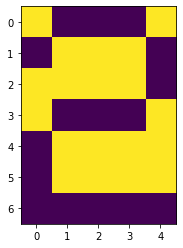

results of adding 80% noise  (by order):



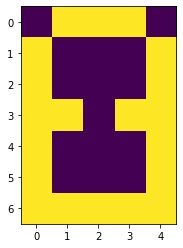

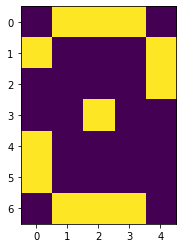

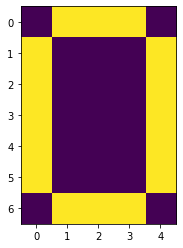

results of adding 20% noise (by order):



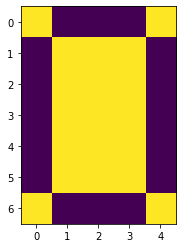

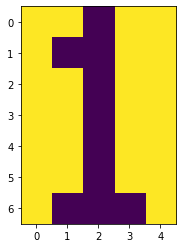

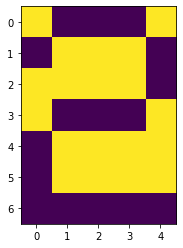

results of adding 80% noise  (by order):



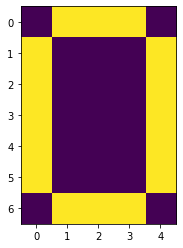

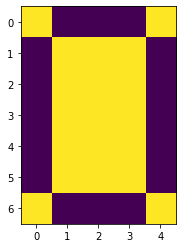

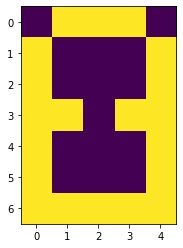

results of adding 20% noise (by order):



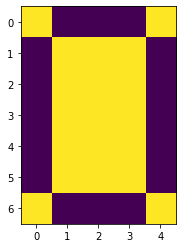

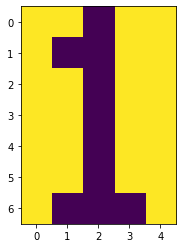

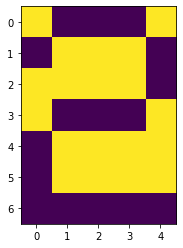

results of adding 80% noise  (by order):



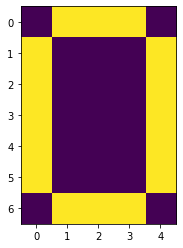

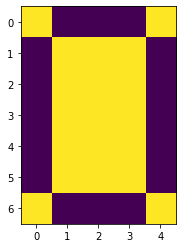

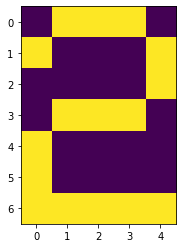

results of adding 20% noise (by order):



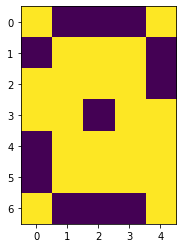

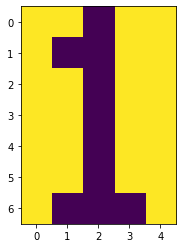

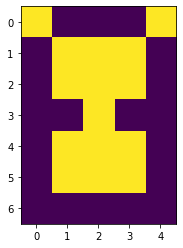

results of adding 80% noise  (by order):



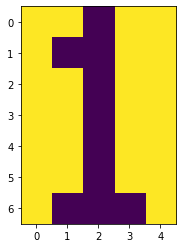

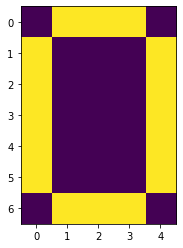

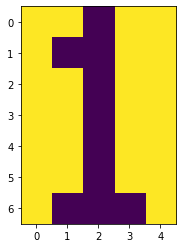

results of adding 20% noise (by order):



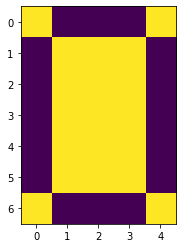

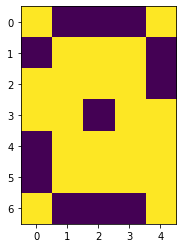

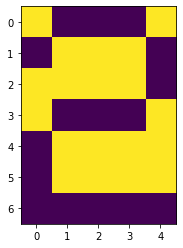

results of adding 80% noise  (by order):



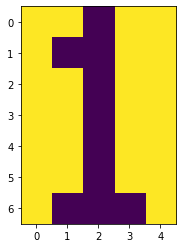

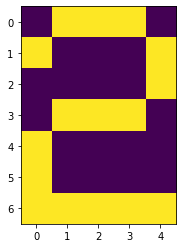

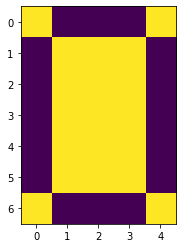

results of adding 20% noise (by order):



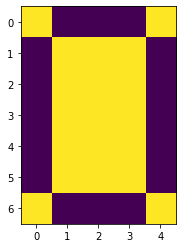

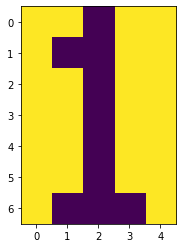

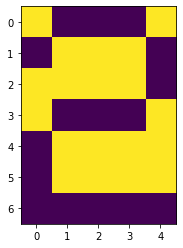

results of adding 80% noise  (by order):



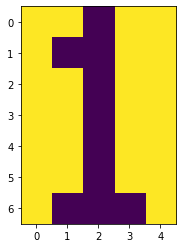

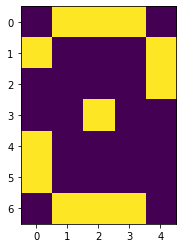

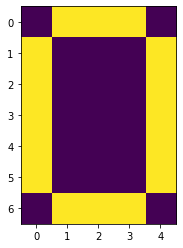

In [26]:
count1=0
count2=0
count3=0
count4=0
count5=0
count6=0

iteration_Num=10000
for i in range(iteration_Num):
    
  noisy_signal1_1=noise_adder(vector1,20)
  noisy_signal1_2=noise_adder(vector1,80)

  noisy_signal2_1=noise_adder(vector2,20)
  noisy_signal2_2=noise_adder(vector2,80)

  noisy_signal3_1=noise_adder(vector3,20)
  noisy_signal3_2=noise_adder(vector3,80)

        
  nn1_1,nn2_1,nn3_1=predict_output_Hebbian_Learning_Rule(noisy_signal1_1,noisy_signal2_1,noisy_signal3_1,W_Hebbian_Rule)
  nn1_2,nn2_2,nn3_2=predict_output_Hebbian_Learning_Rule(noisy_signal1_2,noisy_signal2_2,noisy_signal3_2,W_Hebbian_Rule)
    
  if sum(abs(nn1_1-vector1))==0 :
      count1=count1+1
  if sum(abs(nn2_1-vector2))==0 :
      count2=count2+1
  if sum(abs(nn3_1-vector3))==0 :
      count3=count3+1
        
  if sum(abs(nn1_2-vector1))==0 :
      count4=count4+1
  if sum(abs(nn2_2-vector2))==0 :
      count5=count5+1
  if sum(abs(nn3_2-vector3))==0 :
      count6=count6+1
        
    
        
        
        
  if i%100==0:
      print("results of adding 20% noise (by order):\n")
      n3_plot=np.array(nn1_1)
      n3_plot=n3_plot.reshape((7,5))
      plt.imshow(n3_plot)
      plt.show()
      n3_plot=np.array(nn2_1)
      n3_plot=n3_plot.reshape((7,5))
      plt.imshow(n3_plot)
      plt.show()
      n3_plot=np.array(nn3_1)
      n3_plot=n3_plot.reshape((7,5))
      plt.imshow(n3_plot)
      plt.show()
      print("results of adding 80% noise  (by order):\n")
      n3_plot=np.array(nn1_2)
      n3_plot=n3_plot.reshape((7,5))
      plt.imshow(n3_plot)
      plt.show()
      n3_plot=np.array(nn2_2)
      n3_plot=n3_plot.reshape((7,5))
      plt.imshow(n3_plot)
      plt.show()
      n3_plot=np.array(nn3_2)
      n3_plot=n3_plot.reshape((7,5))
      plt.imshow(n3_plot)
      plt.show()
        
correct_percentage_20noisy1=(count1/(iteration_Num))*100
correct_percentage_80noisy1=(count4/(iteration_Num))*100

correct_percentage_20noisy2=(count2/(iteration_Num))*100
correct_percentage_80noisy2=(count5/(iteration_Num))*100

correct_percentage_20noisy3=(count3/(iteration_Num))*100
correct_percentage_80noisy3=(count6/(iteration_Num))*100



In [27]:
print("correct_percentage_20noisy1:", correct_percentage_20noisy1 )
print("correct_percentage_80noisy1:", correct_percentage_80noisy1 )

print("correct_percentage_20noisy2:", correct_percentage_20noisy2 )
print("correct_percentage_80noisy2:", correct_percentage_80noisy2 )

print("correct_percentage_20noisy3:", correct_percentage_20noisy3)
print("correct_percentage_80noisy3:", correct_percentage_80noisy3)

correct_percentage_20noisy1: 92.27
correct_percentage_80noisy1: 0.21
correct_percentage_20noisy2: 98.63
correct_percentage_80noisy2: 0.32
correct_percentage_20noisy3: 91.71000000000001
correct_percentage_80noisy3: 0.26


results of adding 20% noise (by order):



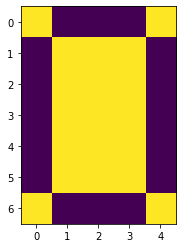

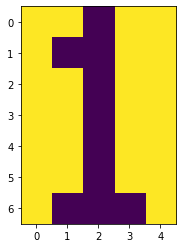

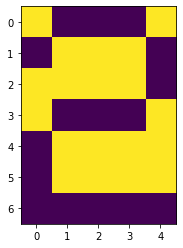

results of adding 80% noise  (by order):



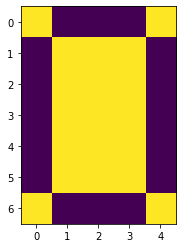

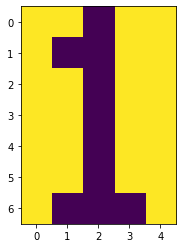

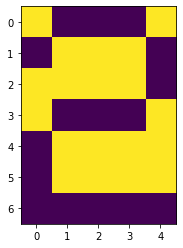

results of adding 20% noise (by order):



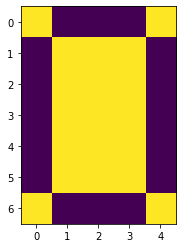

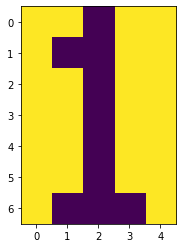

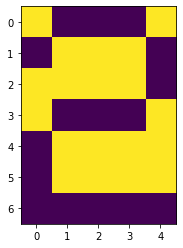

results of adding 80% noise  (by order):



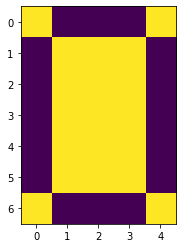

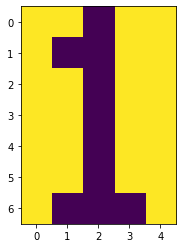

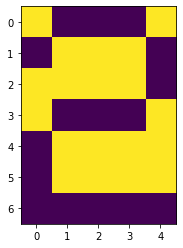

results of adding 20% noise (by order):



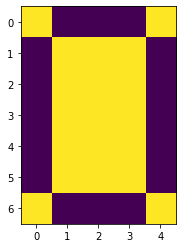

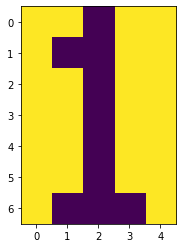

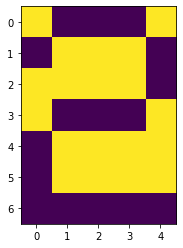

results of adding 80% noise  (by order):



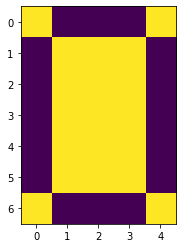

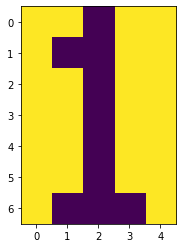

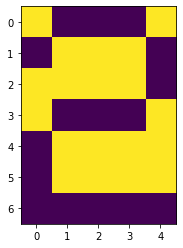

results of adding 20% noise (by order):



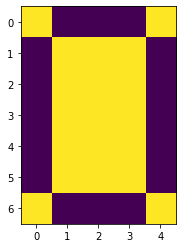

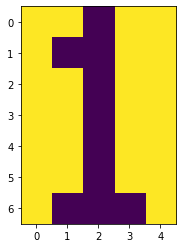

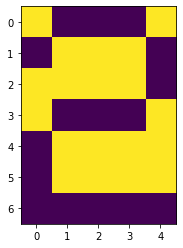

results of adding 80% noise  (by order):



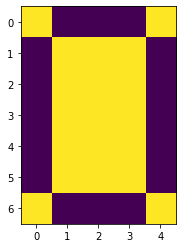

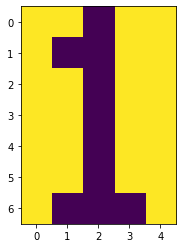

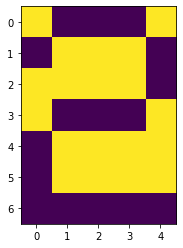

results of adding 20% noise (by order):



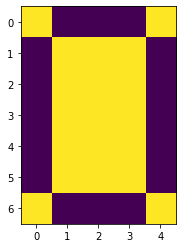

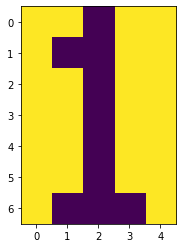

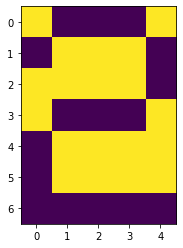

results of adding 80% noise  (by order):



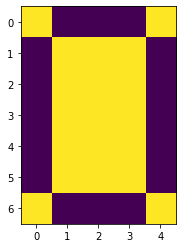

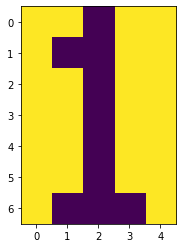

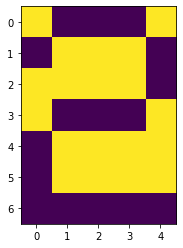

results of adding 20% noise (by order):



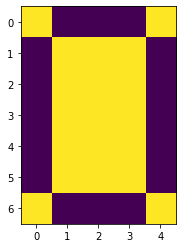

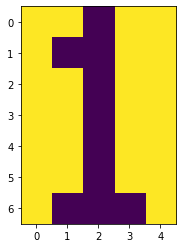

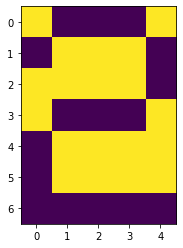

results of adding 80% noise  (by order):



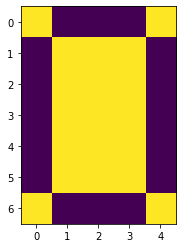

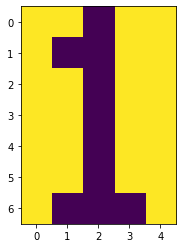

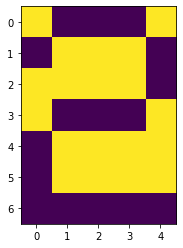

results of adding 20% noise (by order):



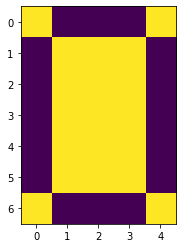

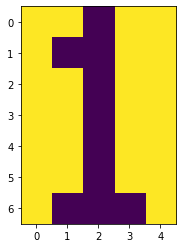

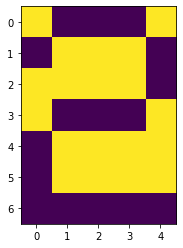

results of adding 80% noise  (by order):



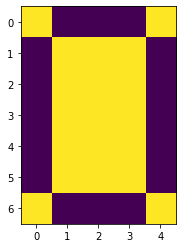

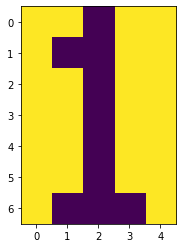

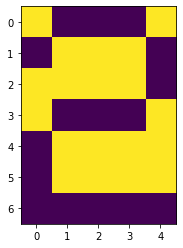

results of adding 20% noise (by order):



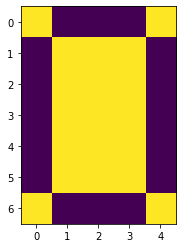

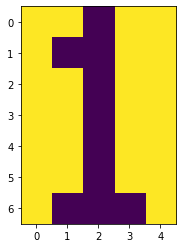

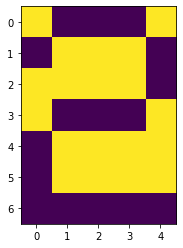

results of adding 80% noise  (by order):



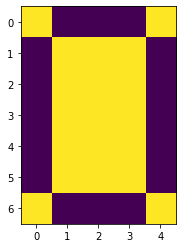

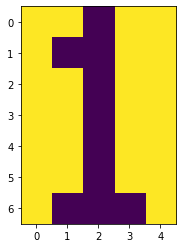

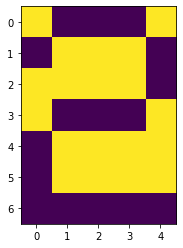

results of adding 20% noise (by order):



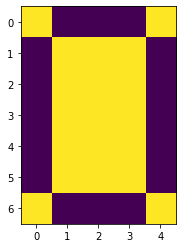

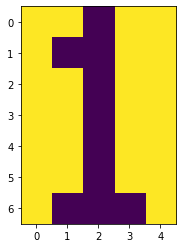

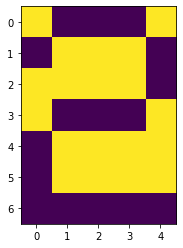

results of adding 80% noise  (by order):



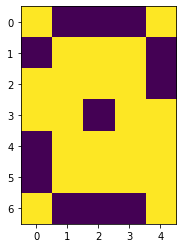

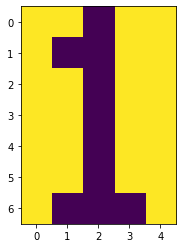

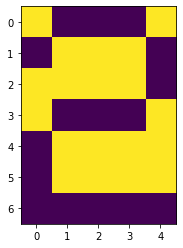

results of adding 20% noise (by order):



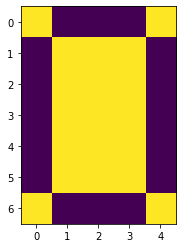

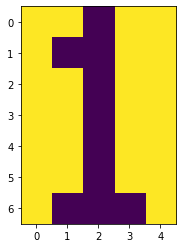

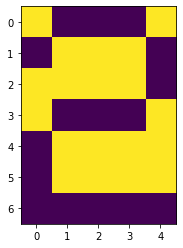

results of adding 80% noise  (by order):



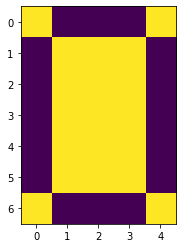

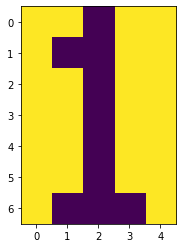

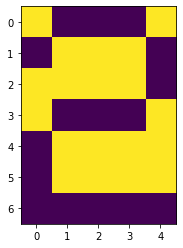

In [28]:
count1=0
count2=0
count3=0
count4=0
count5=0
count6=0

iteration_Num=10000
for i in range(iteration_Num):
    
  lossy_signal1_1=information_loss(vector1,20)
  lossy_signal1_2=information_loss(vector1,80)

  lossy_signal2_1=information_loss(vector2,20)
  lossy_signal2_2=information_loss(vector2,80)

  lossy_signal3_1=information_loss(vector3,20)
  lossy_signal3_2=information_loss(vector3,80)


        
  nnn1_1,nnn2_1,nnn3_1=predict_output_Hebbian_Learning_Rule(lossy_signal1_1,lossy_signal2_1,lossy_signal3_1,W_Hebbian_Rule)
  nnn1_2,nnn2_2,nnn3_2=predict_output_Hebbian_Learning_Rule(lossy_signal1_2,lossy_signal2_2,lossy_signal3_2,W_Hebbian_Rule)
    
  if sum(abs(nnn1_1-vector1))==0 :
      count1=count1+1
  if sum(abs(nnn2_1-vector2))==0 :
      count2=count2+1
  if sum(abs(nnn3_1-vector3))==0 :
      count3=count3+1
        
  if sum(abs(nnn1_2-vector1))==0 :
      count4=count4+1
  if sum(abs(nnn2_2-vector2))==0 :
      count5=count5+1
  if sum(abs(nnn3_2-vector3))==0 :
      count6=count6+1
        
    
        
        
        
  if i%1000==0:
      print("results of adding 20% noise (by order):\n")
      n3_plot=np.array(nnn1_1)
      n3_plot=n3_plot.reshape((7,5))
      plt.imshow(n3_plot)
      plt.show()
      n3_plot=np.array(nnn2_1)
      n3_plot=n3_plot.reshape((7,5))
      plt.imshow(n3_plot)
      plt.show()
      n3_plot=np.array(nnn3_1)
      n3_plot=n3_plot.reshape((7,5))
      plt.imshow(n3_plot)
      plt.show()
      print("results of adding 80% noise  (by order):\n")
      n3_plot=np.array(nnn1_2)
      n3_plot=n3_plot.reshape((7,5))
      plt.imshow(n3_plot)
      plt.show()
      n3_plot=np.array(nnn2_2)
      n3_plot=n3_plot.reshape((7,5))
      plt.imshow(n3_plot)
      plt.show()
      n3_plot=np.array(nnn3_2)
      n3_plot=n3_plot.reshape((7,5))
      plt.imshow(n3_plot)
      plt.show()
        
correct_percentage_20lossy1=(count1/(iteration_Num))*100
correct_percentage_80lossy1=(count4/(iteration_Num))*100

correct_percentage_20lossy2=(count2/(iteration_Num))*100
correct_percentage_80lossy2=(count5/(iteration_Num))*100

correct_percentage_20lossy3=(count3/(iteration_Num))*100
correct_percentage_80lossy3=(count6/(iteration_Num))*100


In [29]:
print("correct_percentage_20lossy1:", correct_percentage_20noisy1 )
print("correct_percentage_80lossy1:", correct_percentage_80noisy1 )

print("correct_percentage_20lossy2:", correct_percentage_20noisy2 )
print("correct_percentage_80lossy2:", correct_percentage_80noisy2 )

print("correct_percentage_20lossy3:", correct_percentage_20noisy3)
print("correct_percentage_80lossy3:", correct_percentage_80noisy3)

correct_percentage_20lossy1: 92.27
correct_percentage_80lossy1: 0.21
correct_percentage_20lossy2: 98.63
correct_percentage_80lossy2: 0.32
correct_percentage_20lossy3: 91.71000000000001
correct_percentage_80lossy3: 0.26


# Bonus


In [30]:
uploaded = files.upload()
im1 = Image.open(BytesIO(uploaded['Image_1.png']))

Saving Image_1.png to Image_1 (1).png


In [31]:
uploaded = files.upload()
im2 = Image.open(BytesIO(uploaded['Image_2.png']))

Saving Image_2.png to Image_2 (1).png


In [32]:
uploaded = files.upload()
im3 = Image.open(BytesIO(uploaded['Image_3.png']))

Saving Image_3.png to Image_3 (1).png


In [33]:
uploaded = files.upload()
im4 = Image.open(BytesIO(uploaded['Image_4.png']))

Saving Image_4.png to Image_4.png


In [34]:
uploaded = files.upload()
im5 = Image.open(BytesIO(uploaded['Image_5.png']))

Saving Image_5.png to Image_5.png


In [35]:
uploaded = files.upload()
im6 = Image.open(BytesIO(uploaded['Image_6.png']))

Saving Image_6.png to Image_6.png


In [36]:
uploaded = files.upload()
im7 = Image.open(BytesIO(uploaded['Image_7.png']))

Saving Image_7.png to Image_7.png


In [37]:
uploaded = files.upload()
im8 = Image.open(BytesIO(uploaded['Image_8.png']))

Saving Image_8.png to Image_8.png


In [38]:
uploaded = files.upload()
im9 = Image.open(BytesIO(uploaded['Image_9.png']))

Saving Image_9.png to Image_9.png


In [39]:
uploaded = files.upload()
im10 = Image.open(BytesIO(uploaded['Image_10.png']))

Saving Image_10.png to Image_10.png


In [40]:
vector1=np.zeros(35)
vector2=np.zeros(35)
vector3=np.zeros(35)
vector4=np.zeros(35)
vector5=np.zeros(35)
vector6=np.zeros(35)
vector7=np.zeros(35)
vector8=np.zeros(35)
vector9=np.zeros(35)
vector10=np.zeros(35)
pix_val1 = list(im1.getdata())
pix_val2 = list(im2.getdata())
pix_val3 = list(im3.getdata())
pix_val4 = list(im4.getdata())
pix_val5 = list(im5.getdata())
pix_val6 = list(im6.getdata())
pix_val7 = list(im7.getdata())
pix_val8 = list(im8.getdata())
pix_val9 = list(im9.getdata())
pix_val10 = list(im10.getdata())
for i in range(len(pix_val1)):
  a1=pix_val1[i]
  a2=pix_val2[i]
  a3=pix_val3[i]
  a4=pix_val4[i]
  a5=pix_val5[i]
  a6=pix_val6[i]
  a7=pix_val7[i]
  a8=pix_val8[i]
  a9=pix_val9[i]
  a10=pix_val10[i]
  if a1[0]==0:
    vector1[i]=-1
  if a1[0]==255:
    vector1[i]=+1
  if a2[0]==0:
    vector2[i]=-1
  if a2[0]==255:
    vector2[i]=+1
  if a3[0]==0:
    vector3[i]=-1
  if a3[0]==255:
    vector3[i]=+1
  if a4[0]==0:
    vector4[i]=+1
  if a4[0]==255:
    vector4[i]=+1
  if a5[0]==0:
    vector5[i]=-1
  if a5[0]==255:
    vector5[i]=+1
  if a6[0]==0:
    vector6[i]=-1
  if a6[0]==255:
    vector6[i]=+1
  if a7[0]==0:
    vector7[i]=-1
  if a7[0]==255:
    vector7[i]=+1
  if a8[0]==0:
    vector8[i]=-1
  if a8[0]==255:
    vector8[i]=+1
  if a9[0]==0:
    vector9[i]=-1
  if a9[0]==255:
    vector9[i]=+1
  if a10[0]==0:
    vector10[i]=-1
  if a10[0]==255:
    vector10[i]=+1


  vector1=vector1.astype(int)
  vector2=vector2.astype(int)
  vector3=vector3.astype(int)
  vector4=vector4.astype(int)
  vector5=vector5.astype(int)
  vector6=vector6.astype(int)
  vector7=vector7.astype(int)
  vector8=vector8.astype(int)
  vector9=vector9.astype(int)
  vector10=vector10.astype(int)

In [50]:
W_Hebbian_Rule_Bonus=np.zeros((35,35))

x=np.zeros((10,35))
y=np.zeros((10,35))
x[0,:]=vector1
x[1,:]=vector2
x[2,:]=vector3
x[3,:]=vector4
x[4,:]=vector5
x[5,:]=vector6
x[6,:]=vector7
x[7,:]=vector8
x[8,:]=vector9
x[9,:]=vector10

y[0,:]=vector1
y[1,:]=vector2
y[2,:]=vector3
y[3,:]=vector4
y[4,:]=vector5
y[5,:]=vector6
y[6,:]=vector7
y[7,:]=vector8
y[8,:]=vector9
y[9,:]=vector10
W_Hebbian_Rule_Bonus = np.linalg.pinv(W_Hebbian_Rule)
print(W_Hebbian_Rule_Bonus)

[[ 1.54320988e-03  5.14403292e-05 -1.54320988e-03 ... -1.54320988e-03
  -1.54320988e-03  1.23456790e-03]
 [ 5.14403292e-05  1.77254801e-03 -5.14403292e-05 ... -5.14403292e-05
  -5.14403292e-05  1.39531893e-03]
 [-1.54320988e-03 -5.14403292e-05  1.54320988e-03 ...  1.54320988e-03
   1.54320988e-03 -1.23456790e-03]
 ...
 [-1.54320988e-03 -5.14403292e-05  1.54320988e-03 ...  1.54320988e-03
   1.54320988e-03 -1.23456790e-03]
 [-1.54320988e-03 -5.14403292e-05  1.54320988e-03 ...  1.54320988e-03
   1.54320988e-03 -1.23456790e-03]
 [ 1.23456790e-03  1.39531893e-03 -1.23456790e-03 ... -1.23456790e-03
  -1.23456790e-03  6.92515432e-03]]


In [44]:
def predict_output_Hebbian_Learning_Rule_Bonus(input_vector1,input_vector2,input_vector3,input_vector4,input_vector5,input_vector6,input_vector7,input_vector8,input_vector9,input_vector10,w):
    res1=[]
    res2=[]
    res3=[]
    res4=[]
    res5=[]
    res6=[]
    res7=[]
    res8=[]
    res9=[]
    res10=[]
    for j in range(35):
        res1.append(np.dot(input_vector1,w[:,j]))
        res2.append(np.dot(input_vector2,w[:,j]))
        res3.append(np.dot(input_vector3,w[:,j]))
        res4.append(np.dot(input_vector4,w[:,j]))
        res5.append(np.dot(input_vector5,w[:,j]))
        res6.append(np.dot(input_vector6,w[:,j]))
        res7.append(np.dot(input_vector7,w[:,j]))
        res8.append(np.dot(input_vector8,w[:,j]))
        res9.append(np.dot(input_vector9,w[:,j]))
        res10.append(np.dot(input_vector10,w[:,j]))
        
        nn1=activation_function(res1)
        nn2=activation_function(res2)
        nn3=activation_function(res3)
        nn4=activation_function(res4)
        nn5=activation_function(res5)
        nn6=activation_function(res6)
        nn7=activation_function(res7)
        nn8=activation_function(res8)
        nn9=activation_function(res9)
        nn10=activation_function(res10)
    

    return nn1,nn2,nn3,nn4,nn5,nn6,nn7,nn8,nn9,nn10

In [48]:
n1,n2,n3,n4,n5,n6,n7,n8,n9,n10=predict_output_Hebbian_Learning_Rule_Bonus(vector1,vector2,vector3,vector4,vector5,vector6,vector7,vector8,vector9,vector10,W_Hebbian_Rule_Bonus)

print("output1:",n1)
print("real output:",vector1-n1)
print("output2:",n2)
print("real output:",vector2-n2)
print("output3:",n3)
print("real output:",vector3-n3)
print("output4:",n4)
print("real output:",vector4-n4)
print("output5:",n5)
print("real output:",vector5-n5)
print("output6:",n6)
print("real output:",vector6-n6)
print("output7:",n7)
print("real output:",vector7-n7)
print("output8:",n8)
print("real output:",vector8-n8)
print("output9:",n9)
print("real output:",vector9-n9)
print("output10:",n10)
print("real output:",vector10-n10)


output1: [1, -1, -1, -1, 1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, 1]
real output: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
output2: [1, 1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, -1, -1, -1, 1]
real output: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
output3: [1, -1, -1, -1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, -1, -1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1, -1, -1, -1]
real output: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
output4: [1, 1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, -1, -1, -1, 1]
real output: [0 0 2 0 0 0 2 2 0 0 0 0 2 0 0 0 0 2 0 0 0 0 2 0 0 0 0 2 0 0 0 2 2 2 0]
output5: [1, 1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, -1, -1, -1, 1]
real output: [ 0  0  0 